#  Install package

In [26]:
# ! pip install pyvis
# ! pip install networkx
# ! pip install openai
# ! pip install contextily
# ! pip install matplotlib_scalebar

# Import package

In [27]:
import os
import requests
import networkx as nx
import pandas as pd
import geopandas as gpd
from pyvis.network import Network
from openai import OpenAI
from IPython.display import display, HTML, Code
from IPython.display import clear_output

import base64

import pickle


# Define Solution class
Please run the following cell to define the functions

In [28]:
%load_ext autoreload
%autoreload 2

import LLM_Cat_Constants as constants
import helper

from LLM_Cat_kernel import Solution

The autoreload extension is already loaded. To reload it, use:
  %reload_ext autoreload


# Demonstration Cases

## Input task and data desciption

In [29]:
# isReview = True
isReview = False

In [30]:
# Case 1
# task_name ='Census_map'
# TASK = r'''1. Create a thematic map to show the Census block group population. The location is Centre County, PA, USA. 
# 2. Carefuly design the map, make it beautiful and aesthetic appeal. The title, north arrow, scalebar, legend, and designer are needed. The designer is "LMM-Cat".
# 3. The map dimension is letter (8*11 inches) size.
# 4. Add a basemap.
# '''



# # Case 2:
# DATA_LOCATIONS = [
#     """Population file, GeoPackage format: E:\\OneDrive_PSU\\OneDrive - The Pennsylvania State University\\Research_doc\\LLM-Cat\\centre_county_CBG.gpkg. Only one layer, no need to load it using a layer name. The population is in the 'totalpopulation' column. The map projection is Lambert Conformal Conic, EPSG 6564, StatePlane Pennsylvania South. The unit is meter.
#     """
# ]

# Case 2:

task_name = 'map_matrix_annual_GDP'

TASK = r""" 1. Create a map matrix showing the per capita GDP of South American countries from 2013 to 2022. The matrix has 10 choropleth submaps (2 rows * 5 columns). Each submap shows a year of per capita GDP. You need to use the year as the submap title. 
2. Carefully design the map and make it beautiful and aesthetically appealing. The entire map matrix (not each submap) needs a title, a north arrow, a scalebar, a colorbar, and a designer. The designer is 'LMM-Cat'. All submaps should use the same range of colormap.
3. The map dimension is the landscape letter (11*8 inches) size, DPI is 150.
"""

DATA_LOCATIONS = [
"""
"Country per capita GPD file, GeoPackage format: E:\\OneDrive_PSU\OneDrive - The Pennsylvania State University\\Research_doc\\LLM-Cat\\ESRI_countries_4326_GDP.gpkg.  Only one layer, no need to load it using a layer name. The map projection is EPSG 4326. The continent column is 'UN_Geodata_simplified_intreg'; 'South America' indicates South America in this column. The GDP columns are named 'country_per_capita_GDP_2013' - 'country_per_capita_GDP_2022'.
"""
]
 # The country name column is 'COUNTRY'.

# Case 3:

# task_name = 'map_matrix_annual_GDP'

# TASK = r""" 1. Create a choropleth map to show the per capita GDP of African countries in the year 2022. The map should have two equal-sized parts on the same page. You need to show a large GDP choropleth African continent submap with all African countries on the left part, and another map matrix of 9 rows * 6 columns on the right part, each submap in the map matrix shows an individual country in Africa, ordered by the per capita GDP; the filling color of each country in the map matrix should as the same as its color in the continent map; you need to use the country name as the submap title. 
# 2. Carefully design the map and make it beautiful and aesthetically appealable. The title, north arrow, scalebar, legend, and designer are needed for the Africa map, but not for the map matrix. The designer is 'LMM-Cat'.
# 3. The map dimension is the landscape letter (11*8 inches) size, DPI is 150.
# """

# DATA_LOCATIONS = [
# """
# "Country per capita GPD file, GeoPackage format: E:\\OneDrive_PSU\OneDrive - The Pennsylvania State University\\Research_doc\\LLM-Cat\\ESRI_countries_4326_GDP.gpkg.  Only one layer, no need to load it using a layer name. The country name column is 'COUNTRY'. The map projection is EPSG 4326. The continent column is 'UN_Geodata_simplified_georeg'; 'AFR' indicates Africa in this column. The 2022 GDP column is 'country_per_capita_GDP_2022'
# """
# ]

save_dir = os.path.join(os.getcwd(), task_name)
os.makedirs(save_dir, exist_ok=True)

# create graph
# model=r"gpt-4"
# model = r'gpt-4-turbo-preview'
model = r'gpt-4-turbo'
solution = Solution(
                    task=TASK,
                    task_name=task_name,
                    save_dir=save_dir,
                    data_locations=DATA_LOCATIONS,
                    model=model,
                    )
print("Prompt to get solution graph:\n")
print(solution.graph_prompt)

Prompt to get solution graph:

Your role: A professional cartographer and programmer good at Python. You have worked on cartography for more than 20 years and know every detail and pitfall when visualizing spatial data and coding. You know how to set up workflows for cartography tasks well. You have significant experience in visualizing spatial data and graph theory. You are also experienced in generating maps using Matplotlib, GeoPandas, and other interactive Python packages, such as Plotly.
 

Your task: Generate a graph (data structure) only, whose nodes are a series of consecutive steps to make a map, including visualizing the data add map elements such as title, legend, scalebar, label, and annotation.:  
  1. Create a map matrix showing the per capita GDP of South American countries from 2013 to 2022. The matrix has 10 choropleth submaps (2 rows * 5 columns). Each submap shows a year of per capita GDP. You need to use the year as the submap title. 
2. Carefully design the map and

## Get graph code from GPT API

In [31]:
response_for_graph = solution.get_LLM_response_for_graph() 
solution.graph_response = response_for_graph
solution.save_solution()

clear_output(wait=True)
display(Code(solution.code_for_graph, language='python'))

import networkx as nx

G = nx.DiGraph()

# Data Nodes
G.add_node("GDP_data_path", node_type="data", data_path="E:\\OneDrive_PSU\\OneDrive - The Pennsylvania State University\\Research_doc\\LLM-Cat\\ESRI_countries_4326_GDP.gpkg", description="Path to country per capita GDP GeoPackage")

# Operation Nodes
G.add_node("load_GDP_data", node_type="operation", description="Load GDP data from GeoPackage")
G.add_edge("GDP_data_path", "load_GDP_data")

G.add_node("GDP_gdf", node_type="data", description="GeoDataFrame containing GDP data")
G.add_edge("load_GDP_data", "GDP_gdf")

G.add_node("filter_South_American_countries", node_type="operation", description="Filter to include only South American countries")
G.add_edge("GDP_gdf", "filter_South_American_countries")

G.add_node("south_america_GDP_gdf", node_type="data", description="GeoDataFrame of South American countries with GDP data")
G.add_edge("filter_South_American_countries", "south_america_GDP_gdf")

G.add_node("create_choropleth_maps", node_type="operation", description="Create choropleth maps for each year")
G.add_edge("south_america_GDP_gdf", "create_choropleth_maps")

G.add_node("choropleth_maps", node_type="data", description="Choropleth maps for the period 2013-2022")
G.add_edge("create_choropleth_maps", "choropleth_maps")

G.add_node("add_map_elements", node_type="operation", description="Add title, legend, north arrow, scalebar, designer label")
G.add_edge("choropleth_maps", "add_map_elements")

G.add_node("final_map_matrix", node_type="data", description="Final map matrix with all elements")
G.add_edge("add_map_elements", "final_map_matrix")

G.add_node("save_map_as_image", node_type="operation", description="Save the map matrix as an image")
G.add_edge("final_map_matrix", "save_map_as_image")

G.add_node("map_image_path", node_type="data", data_path="E:\\OneDrive_PSU\\OneDrive - The Pennsylvania State University\\Research_doc\\LLM-Cat\\map_matrix_annual_GDP\\map_matrix.png", description="The path where the final map image is saved")
G.add_edge("save_map_as_image", "map_image_path")

# Save Graph
nx.write_graphml(G, "e:\\OneDrive_PSU\\OneDrive - The Pennsylvania State University\\Research_doc\\LLM-Cat\\map_matrix_annual_GDP\\map_matrix_annual_GDP.graphml")

## Execute code to generate the solution graph

In [32]:
exec(solution.code_for_graph)
solution_graph = solution.load_graph_file()

# Show the graph
G = nx.read_graphml(solution.graph_file)  
nt = helper.show_graph(G)
html_name = os.path.join(os.getcwd(), solution.task_name + '.html')  
# HTML file should in the same directory. See:
# https://stackoverflow.com/questions/65564916/error-displaying-pyvis-html-inside-jupyter-lab-cell
nt.show(name=html_name)
# html_name

e:\OneDrive_PSU\OneDrive - The Pennsylvania State University\Research_doc\LLM-Cat\map_matrix_annual_GDP.html


## Generate prompts and code for operations (functions)

In [33]:
operations = solution.get_LLM_responses_for_operations(review=isReview)
solution.save_solution()

all_operation_code_str = '\n'.join([operation['operation_code'] for operation in operations])

clear_output(wait=True)
display(Code(all_operation_code_str, language='python'))

import geopandas as gpd

def load_GDP_data(GDP_data_path='E:\\OneDrive_PSU\\OneDrive - The Pennsylvania State University\\Research_doc\\LLM-Cat\\ESRI_countries_4326_GDP.gpkg'):
    """
    Description: Load GDP data from GeoPackage
    """
    GDP_gdf = gpd.read_file(GDP_data_path)
    return GDP_gdf
def filter_South_American_countries(GDP_gdf):
    """
    Description: Filter to include only South American countries
    """
    south_america_GDP_gdf = GDP_gdf[GDP_gdf['UN_Geodata_simplified_intreg'] == 'South America']
    return south_america_GDP_gdf
import matplotlib.pyplot as plt
import geopandas as gpd

def create_choropleth_maps(south_america_GDP_gdf):
    """
    Description: Create choropleth maps for each year
    """
    # Define the figure for the subplot matrix (2 rows, 5 columns)
    fig, axes = plt.subplots(nrows=2, ncols=5, figsize=(11, 8), dpi=150)
    
    # Flatten the axes array for easier iteration
    axes = axes.flatten()
    
    # Define the color map to be used and the range of the colormap
    cmap = 'viridis'
    vmin = south_america_GDP_gdf[[f'country_per_capita_GDP_{year}' for year in range(2013, 2023)]].min().min()
    vmax = south_america_GDP_gdf[[f'country_per_capita_GDP_{year}' for year in range(2013, 2023)]].max().max()

    # Loop through each year and create a choropleth map for each subplot
    for i, year in enumerate(range(2013, 2023)):
        # Filter the column for the specific year
        ax = axes[i]
        south_america_GDP_gdf.plot(column=f'country_per_capita_GDP_{year}', cmap=cmap, 
                                   legend=True, ax=ax, vmin=vmin, vmax=vmax)
        
        # Set subplot title to the year
        ax.set_title(str(year))
        
        # Remove axes
        ax.set_axis_off()

    # Add color bar to the last subplot
    fig.colorbar(plt.cm.ScalarMappable(cmap=cmap, norm=plt.Normalize(vmin=vmin, vmax=vmax)), ax=axes, orientation='horizontal', fraction=0.05, pad=0.05)

    # Tight layout for better spacing
    fig.tight_layout()
    
    # Create a list to store each subplot as an element
    choropleth_maps = [ax for ax in axes]

    return choropleth_maps
import matplotlib.pyplot as plt
from matplotlib_scalebar.scalebar import ScaleBar

def add_map_elements(choropleth_maps):
    """
    Description: Add title, legend, north arrow, scalebar, designer label
    """
    # Master figure creation
    fig, axes = plt.subplots(2, 5, figsize=(11, 8), dpi=150)
    axes = axes.ravel()
    
    # Layout settings
    fig.suptitle("South American Countries - Per Capita GDP 2013 to 2022", fontsize=16, fontweight='bold')
    plt.subplots_adjust(top=0.85)
    
    # Assign each choropleth map to a subplot in master figure
    for i, ax in enumerate(axes):
        ax = choropleth_maps[i]
    
    # Add north arrow
    x, y, arrow_length = 0.95, 0.95, 0.1
    axes[0].annotate('N', xy=(x, y), xytext=(x, y-arrow_length),
                     arrowprops=dict(facecolor='black', width=5, headwidth=15),
                     ha='center', va='center', fontsize=12, xycoords='axes fraction')

    # Add scale bar
    scalebar = ScaleBar(1, location='lower left', units='km', scale_loc='bottom', length_fraction=0.15)
    axes[0].add_artist(scalebar)
    
    # Add designer label
    fig.text(0.1, 0.02, 'Designed by LMM-Cat', style='italic', fontsize=8)

    # Return final map matrix
    return fig
def save_map_as_image(final_map_matrix):
    """
    Description: Save the map matrix as an image
    """
    map_image_path = "E:\\OneDrive_PSU\\OneDrive - The Pennsylvania State University\\Research_doc\\LLM-Cat\\map_matrix_annual_GDP\\map_matrix.png"
    final_map_matrix.savefig(map_image_path, dpi=150, bbox_inches='tight')
    return map_image_path

## Generate prompts and code for assembly program

In [34]:
assembly_LLM_response = solution.get_LLM_assembly_response(review=isReview)
solution.assembly_LLM_response = assembly_LLM_response
solution.save_solution()

clear_output(wait=True)
display(Code(solution.code_for_assembly, language='python'))

import geopandas as gpd
import matplotlib.pyplot as plt
from matplotlib_scalebar.scalebar import ScaleBar
import matplotlib.colors as colors

def load_GDP_data(GDP_data_path='E:\\OneDrive_PSU\\OneDrive - The Pennsylvania State University\\Research_doc\\LLM-Cat\\ESRI_countries_4326_GDP.gpkg'):
    GDP_gdf = gpd.read_file(GDP_data_path)
    return GDP_gdf

def filter_South_American_countries(GDP_gdf):
    south_america_GDP_gdf = GDP_gdf[GDP_gdf['UN_Geodata_simplified_intreg'] == 'South America']
    return south_america_GDP_gdf

def create_choropleth_maps(south_america_GDP_gdf):
    fig, axes = plt.subplots(nrows=2, ncols=5, figsize=(11, 8), dpi=150)
    axes = axes.flatten()
    cmap = 'viridis'
    vmin = south_america_GDP_gdf[[f'country_per_capita_GDP_{year}' for year in range(2013, 2023)]].min().min()
    vmax = south_america_GDP_gdf[[f'country_per_capita_GDP_{year}' for year in range(2013, 2023)]].max().max()
    
    for i, year in enumerate(range(2013, 2023)):
        ax = axes[i]
        south_america_GDP_gdf.plot(column=f'country_per_capita_GDP_{year}', cmap=cmap, 
                                   legend=True, ax=ax, vmin=vmin, vmax=vmax)
        ax.set_title(str(year))
        ax.set_axis_off()
    
    sm = plt.cm.ScalarMappable(cmap=cmap, norm=plt.Normalize(vmin=vmin, vmax=vmax))
    cbar = fig.colorbar(sm, ax=axes, orientation='horizontal', fraction=0.05, pad=0.05)
    fig.tight_layout()
    return fig

def add_map_elements(fig):
    fig.suptitle("South American Countries - Per Capita GDP 2013 to 2022", fontsize=16, fontweight='bold')
    plt.subplots_adjust(top=0.85)
    x, y, arrow_length = 0.95, 0.95, 0.1
    fig.axes[0].annotate('N', xy=(x, y), xytext=(x, y-arrow_length),
                     arrowprops=dict(facecolor='black', width=5, headwidth=15),
                     ha='center', va='center', fontsize=12, xycoords='axes fraction')
    scalebar = ScaleBar(1, location='lower left', units='km', scale_loc='bottom', length_fraction=0.15)
    fig.axes[0].add_artist(scalebar)
    fig.text(0.1, 0.02, 'Designed by LMM-Cat', style='italic', fontsize=8)
    return fig

def save_map_as_image(fig):
    fig.savefig("output_map.png", dpi=100, bbox_inches='tight')

def assembly_solution():
    GDP_gdf = load_GDP_data()
    south_america_GDP_gdf = filter_South_American_countries(GDP_gdf)
    fig = create_choropleth_maps(south_america_GDP_gdf)
    fig = add_map_elements(fig)
    save_map_as_image(fig)

assembly_solution()

## Execute assembly code

In [35]:
all_code = all_operation_code_str + '\n' + solution.code_for_assembly

# display(Code(all_code, language='python'))
solution.all_code = all_code



-------------- Running code (trial # 1/10) --------------




Complete program:126: UserWarning: This figure includes Axes that are not compatible with tight_layout, so results might be incorrect.
  stream=stream)




--------------- Done ---------------




import geopandas as gpd

def load_GDP_data(GDP_data_path='E:\\OneDrive_PSU\\OneDrive - The Pennsylvania State University\\Research_doc\\LLM-Cat\\ESRI_countries_4326_GDP.gpkg'):
    """
    Description: Load GDP data from GeoPackage
    """
    GDP_gdf = gpd.read_file(GDP_data_path)
    return GDP_gdf
def filter_South_American_countries(GDP_gdf):
    """
    Description: Filter to include only South American countries
    """
    south_america_GDP_gdf = GDP_gdf[GDP_gdf['UN_Geodata_simplified_intreg'] == 'South America']
    return south_america_GDP_gdf
import matplotlib.pyplot as plt
import geopandas as gpd

def create_choropleth_maps(south_america_GDP_gdf):
    """
    Description: Create choropleth maps for each year
    """
    # Define the figure for the subplot matrix (2 rows, 5 columns)
    fig, axes = plt.subplots(nrows=2, ncols=5, figsize=(11, 8), dpi=150)
    
    # Flatten the axes array for easier iteration
    axes = axes.flatten()
    
    # Define the color map to be used and the range of the colormap
    cmap = 'viridis'
    vmin = south_america_GDP_gdf[[f'country_per_capita_GDP_{year}' for year in range(2013, 2023)]].min().min()
    vmax = south_america_GDP_gdf[[f'country_per_capita_GDP_{year}' for year in range(2013, 2023)]].max().max()

    # Loop through each year and create a choropleth map for each subplot
    for i, year in enumerate(range(2013, 2023)):
        # Filter the column for the specific year
        ax = axes[i]
        south_america_GDP_gdf.plot(column=f'country_per_capita_GDP_{year}', cmap=cmap, 
                                   legend=True, ax=ax, vmin=vmin, vmax=vmax)
        
        # Set subplot title to the year
        ax.set_title(str(year))
        
        # Remove axes
        ax.set_axis_off()

    # Add color bar to the last subplot
    fig.colorbar(plt.cm.ScalarMappable(cmap=cmap, norm=plt.Normalize(vmin=vmin, vmax=vmax)), ax=axes, orientation='horizontal', fraction=0.05, pad=0.05)

    # Tight layout for better spacing
    fig.tight_layout()
    
    # Create a list to store each subplot as an element
    choropleth_maps = [ax for ax in axes]

    return choropleth_maps
import matplotlib.pyplot as plt
from matplotlib_scalebar.scalebar import ScaleBar

def add_map_elements(choropleth_maps):
    """
    Description: Add title, legend, north arrow, scalebar, designer label
    """
    # Master figure creation
    fig, axes = plt.subplots(2, 5, figsize=(11, 8), dpi=150)
    axes = axes.ravel()
    
    # Layout settings
    fig.suptitle("South American Countries - Per Capita GDP 2013 to 2022", fontsize=16, fontweight='bold')
    plt.subplots_adjust(top=0.85)
    
    # Assign each choropleth map to a subplot in master figure
    for i, ax in enumerate(axes):
        ax = choropleth_maps[i]
    
    # Add north arrow
    x, y, arrow_length = 0.95, 0.95, 0.1
    axes[0].annotate('N', xy=(x, y), xytext=(x, y-arrow_length),
                     arrowprops=dict(facecolor='black', width=5, headwidth=15),
                     ha='center', va='center', fontsize=12, xycoords='axes fraction')

    # Add scale bar
    scalebar = ScaleBar(1, location='lower left', units='km', scale_loc='bottom', length_fraction=0.15)
    axes[0].add_artist(scalebar)
    
    # Add designer label
    fig.text(0.1, 0.02, 'Designed by LMM-Cat', style='italic', fontsize=8)

    # Return final map matrix
    return fig
def save_map_as_image(final_map_matrix):
    """
    Description: Save the map matrix as an image
    """
    map_image_path = "E:\\OneDrive_PSU\\OneDrive - The Pennsylvania State University\\Research_doc\\LLM-Cat\\map_matrix_annual_GDP\\map_matrix.png"
    final_map_matrix.savefig(map_image_path, dpi=150, bbox_inches='tight')
    return map_image_path
import geopandas as gpd
import matplotlib.pyplot as plt
from matplotlib_scalebar.scalebar import ScaleBar
import matplotlib.colors as colors

def load_GDP_data(GDP_data_path='E:\\OneDrive_PSU\\OneDrive - The Pennsylvania State University\\Research_doc

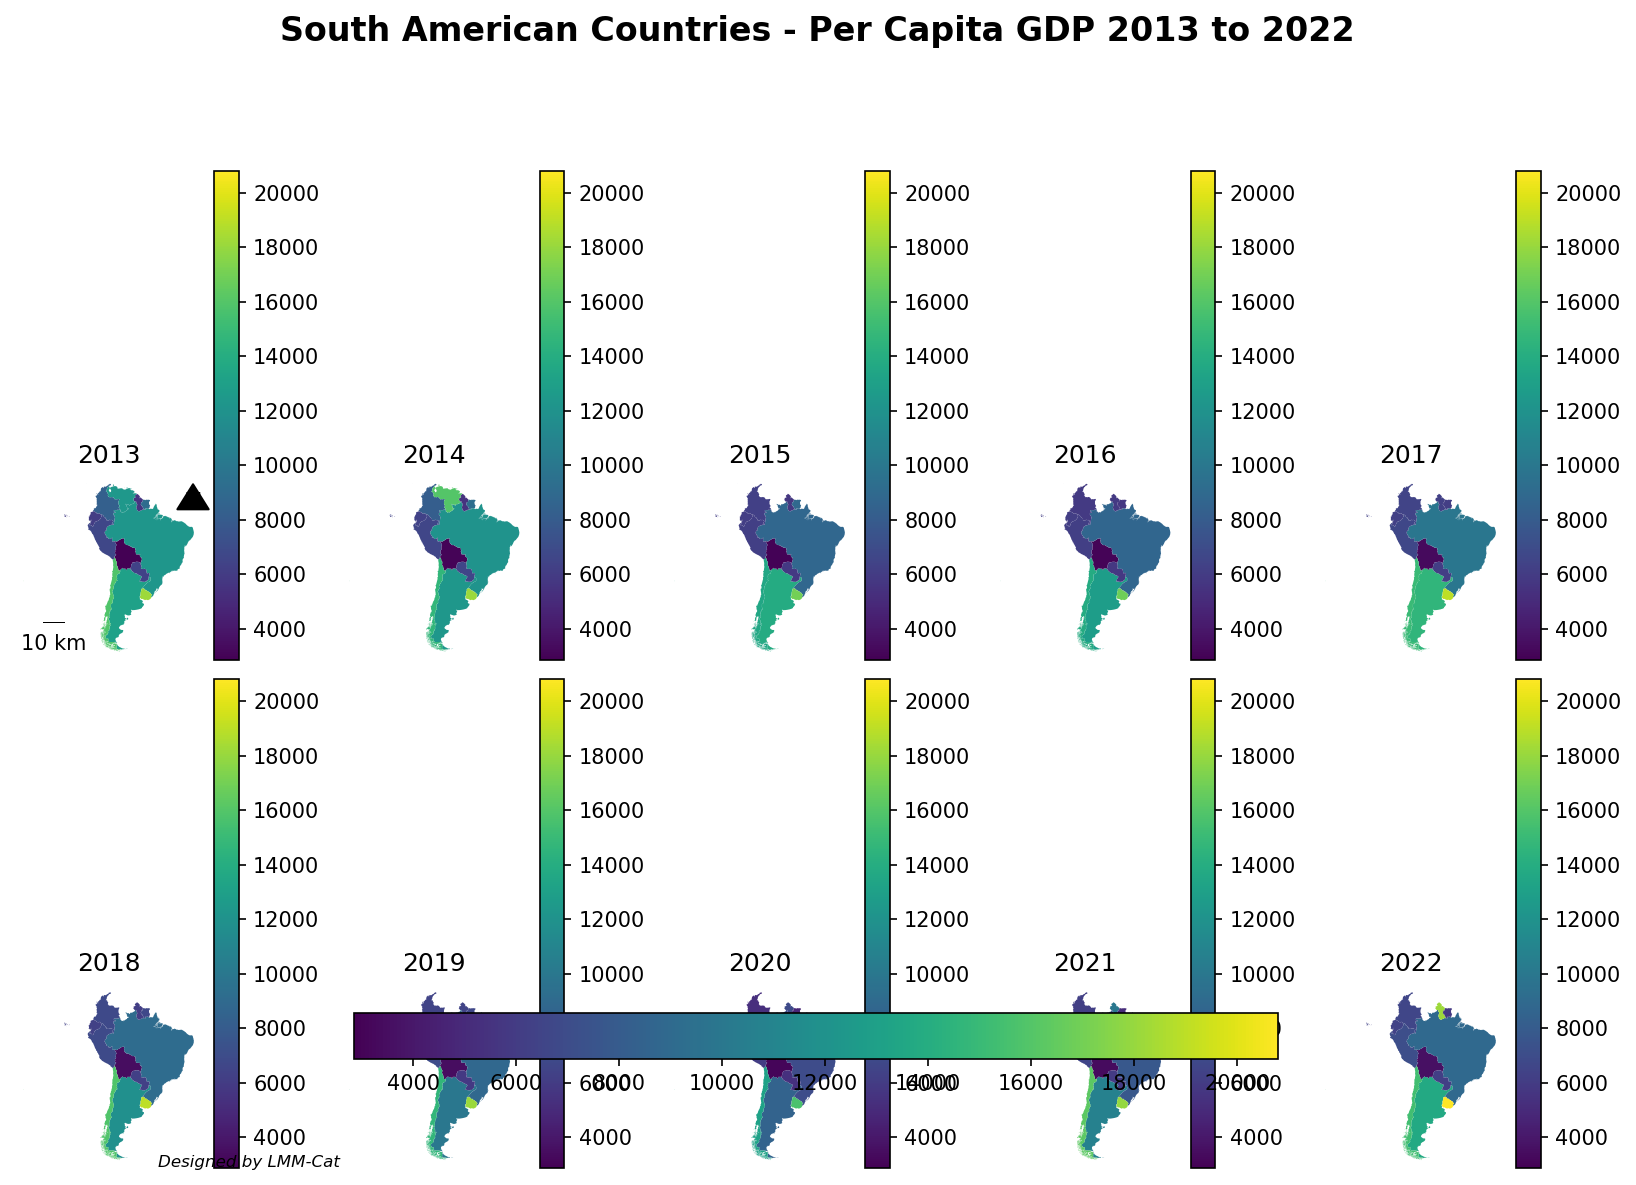

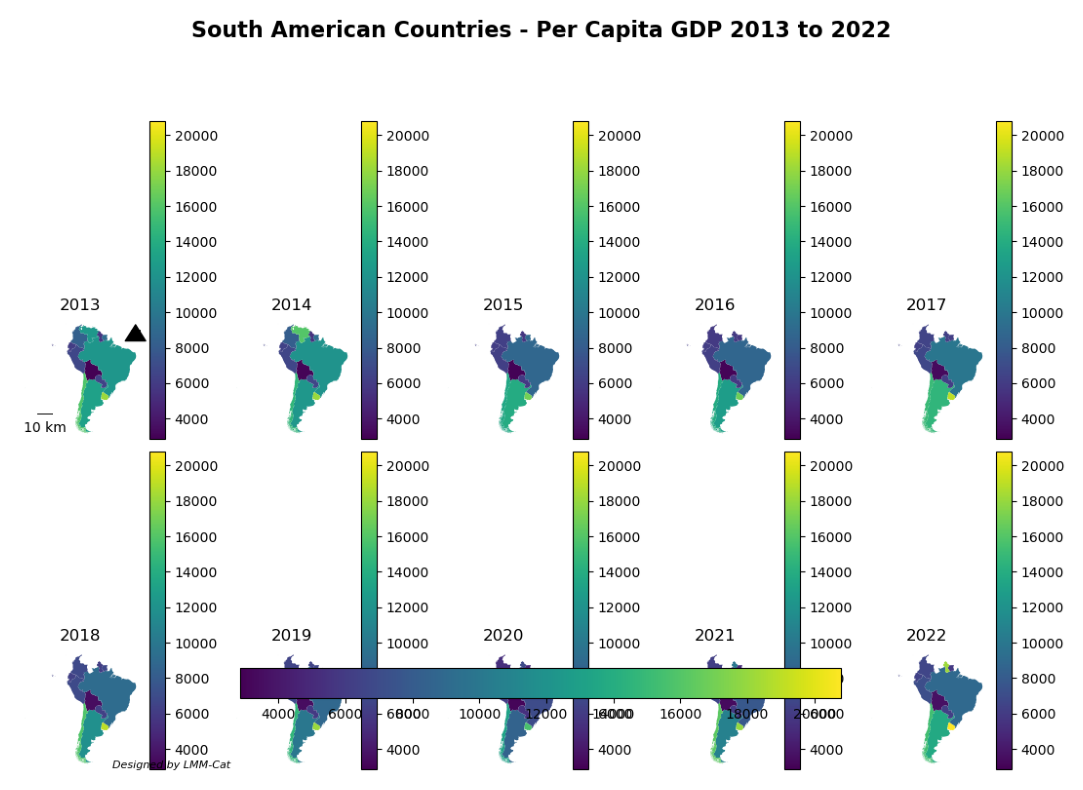

In [36]:
all_code = solution.execute_complete_program(code=solution.all_code, try_cnt=10)

solution.all_code = all_code

image_path = r"E:\OneDrive_PSU\OneDrive - The Pennsylvania State University\Research_doc\LLM-Cat\output_map.png"
from PIL import Image
import matplotlib.pyplot as plt

def show_map():
    image = Image.open(image_path)    
    fig, ax = plt.subplots(figsize=(15, 10))
    ax.set_axis_off()
    plt.imshow(image)
    
show_map()   
display(Code(all_code, language='python'))

In [37]:
# display(Code(all_code, language='python'))

# Beautify map

In [38]:
print(solution.get_review_prompt())

Your role: A professional cartographer. You have worked on cartography for more than 20 years and know how to design an aesthetic appeal map. Your current job is to review the map generated by AI. You need to detail the issues with the given map so that the AI can improve the map later. Note that AI makes the map via generated code, so your comments should be suitable for improvements by code. The map requirements are also provided.
 
Your task: Observe the given map carefully using the viewpoint of an experienced cartographer. 

Requirements: 
1. Elaborate on the issues, then provide specific and actionable improvements, such as 'move the legend to the up-left to void obscuring'. If you think there is no issue, no need to mention it.
2. Whether the map meets cartography requirements for the map.
3. Whether there are obstructions between labels, annotations, axis labels, axis ticks, title, legend, scale bar, and other map elements.
4. Whether the title semantically meets the data and m

## Map review

1. The overall title of the map matrix overlaps slightly with the top row of the map: reposition to provide clearer spacing.
2. The scale bar and north arrow should appear only once, ideally in a corner or along the bottom of the entire matrix to avoid repetition and reduce clutter.
3. The legend color bars on the left are inconsistent in positioning relative to their respective maps; align these uniformly across each row.
4. The numerical labels on the color bars are overlapping map content (particularly visible in the 2020 map): adjust the spacing or positioning of the color bars.
5. The font size for the year labels varies and is inconsistent; standardize to improve readability and aesthetic uniformity.
6. The designer's credit 'Designed by LMM-Cat' is too close to the 2022 map, possibly leading to confusion about its relevance: move this to a more neutral location, perhaps at the bottom center of the entire matrix.
7. Alignment of the submap titles (years) is inconsistent. Some tit

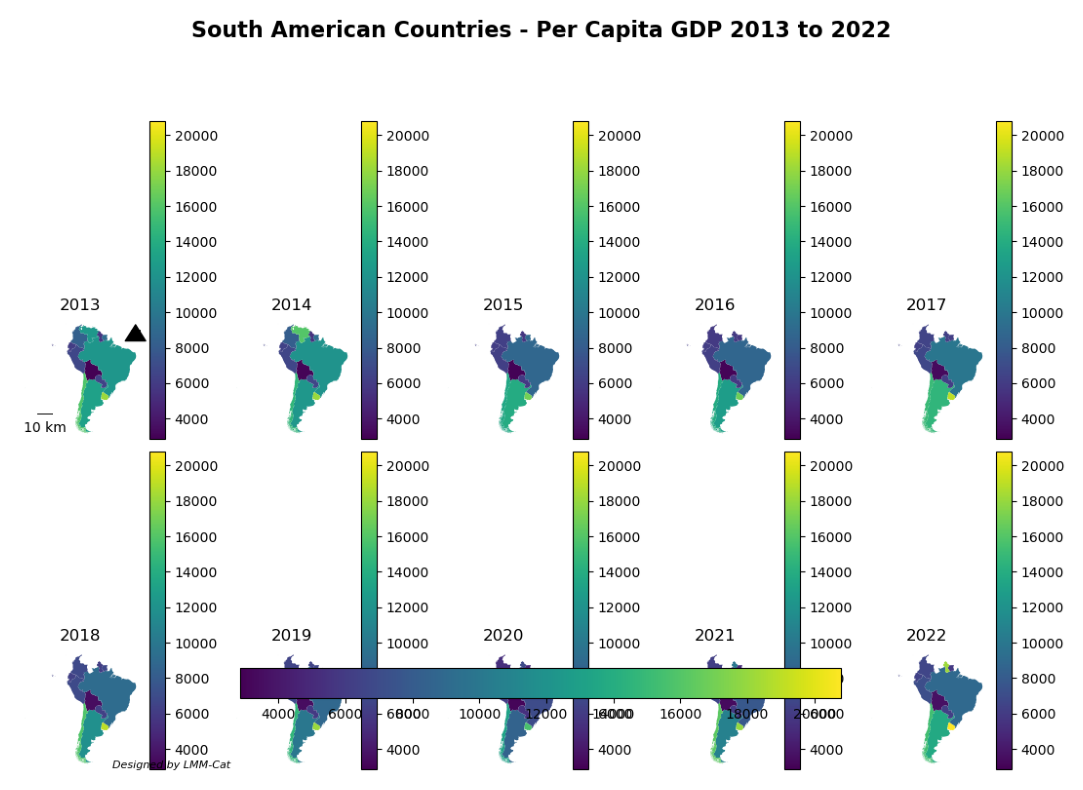

In [39]:
def encode_image(image_path):
  with open(image_path, "rb") as image_file:
    return base64.b64encode(image_file.read()).decode('utf-8')

# Path to your image
image_path = r"E:\OneDrive_PSU\OneDrive - The Pennsylvania State University\Research_doc\LLM-Cat\output_map.png"

# Getting the base64 string
base64_image = encode_image(image_path)

from PIL import Image
import matplotlib.pyplot as plt

def show_map():
    image = Image.open(image_path)    
    fig, ax = plt.subplots(figsize=(15, 10))
    ax.set_axis_off()
    plt.imshow(image)


solution.ask_LLM_to_review_map(map_base64=base64_image, model='gpt-4-turbo')

show_map()

## Beautify 1

Revising the map, trial 1 / 1
1. The main title font size is too small compared to the size of the map: it needs to be enlarged to enhance readability and emphasis.
2. The color bars should be consistent across all submaps but the 2019 submap has a different color scale: ensure all submaps use the same colormap to avoid confusion and maintain uniformity.
3. The north arrow is only present on the 2013 submap: a north arrow should be included on each submap or moved to a central, clear position where it applies to all submaps simultaneously.
4. The scale bars are inconsistent, appearing in varying sizes and only on some submaps: standardize the scale bar across all submaps for coherence.
5. Text for the designer 'Designed by LMM-Cat' is too close to the edge of the map, risking cropping or lack of visibility in certain formats: move this text slightly inward to ensure visibility.
6. Axis labels, particularly the color scale labels, lack consistency in placement and are sometimes clipped 

e:\ProgramData\Anaconda3\lib\site-packages\geopandas\geodataframe.py:1543: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  super().__setitem__(key, value)




--------------- Done ---------------




import geopandas as gpd
import matplotlib.pyplot as plt
from matplotlib_scalebar.scalebar import ScaleBar

def load_GDP_data(GDP_data_path='E:\\OneDrive_PSU\\OneDrive - The Pennsylvania State University\\Research_doc\\LLM-Cat\\ESRI_countries_4326_GDP.gpkg'):
    GDP_gdf = gpd.read_file(GDP_data_path)
    return GDP_gdf

def filter_South_American_countries(GDP_gdf):
    # Correct column name for filtering South American countries
    south_america_GDP_gdf = GDP_gdf[GDP_gdf['UN_Geodata_simplified_intreg'] == 'South America']
    return south_america_GDP_gdf

def create_choropleth_maps(south_america_GDP_gdf):
    fig, axes = plt.subplots(nrows=2, ncols=5, figsize=(11, 8), dpi=150, facecolor='w', edgecolor='k')
    axes = axes.ravel()
    cmap = 'coolwarm'
    
    # Clean and convert GDP values to float
    for column in south_america_GDP_gdf.columns:
        if 'country_per_capita_GDP_' in column:
            south_america_GDP_gdf[column] = pd.to_numeric(south_america_GDP_gdf[column], errors='coerce')
    
    # Compute the global min and max across all GDP columns for consistent color mapping
    vmin = min(south_america_GDP_gdf[column].min(skipna=True) for column in south_america_GDP_gdf.columns if 'country_per_capita_GDP_' in column)
    vmax = max(south_america_GDP_gdf[column].max(skipna=True) for column in south_america_GDP_gdf.columns if 'country_per_capita_GDP_' in column)

    for i, year in enumerate(range(2013, 2023)):
        ax = axes[i]
        # Clean and plot data
        column_name = f'country_per_capita_GDP_{year}'
        south_america_GDP_gdf.plot(column=column_name, cmap=cmap, ax=ax, vmin=vmin, vmax=vmax, legend=False)
        ax.set_title(f'Year: {year}', fontsize=10, fontweight='bold')
        ax.set_axis_off()

    # Adding a colorbar
    fig.colorbar(plt.cm.ScalarMappable(cmap=cmap, norm=plt.Normalize(vmin=vmin, vmax=vmax)), ax=axes, orientation='horizontal', fraction=0.04, pad=0.1)
    plt.subplots_adjust(hspace=0.3, wspace=0.1)
    return fig

def add_map_elements(fig):
    fig.suptitle("South American Countries - Per Capita GDP 2013 to 2022", fontsize=16, fontweight='bold', color='blue')
    fig.text(s='N', x=0.5, y=0.05, fontsize=20, ha='center', va='center', backgroundcolor='w')  # Adjusted for visibility
    scalebar = ScaleBar(100000, location='lower left', scale_loc='bottom', length_fraction=0.025, height_fraction=0.01, frameon=False, color='black', label='100 km')
    fig.axes[0].add_artist(scalebar)
    fig.text(0.1, 0.02, 'Designed by LMM-Cat', style='italic', fontsize=12)
    return fig

def save_map_as_image(fig):
    fig.savefig("output_map.png", dpi=150, bbox_inches='tight')

def assembly_solution():
    GDP_gdf = load_GDP_data()
    south_america_GDP_gdf = filter_South_American_countries(GDP_gdf)
    fig = create_choropleth_maps(south_america_GDP_gdf)
    fig = add_map_elements(fig)
    save_map_as_image(fig)

assembly_solution()

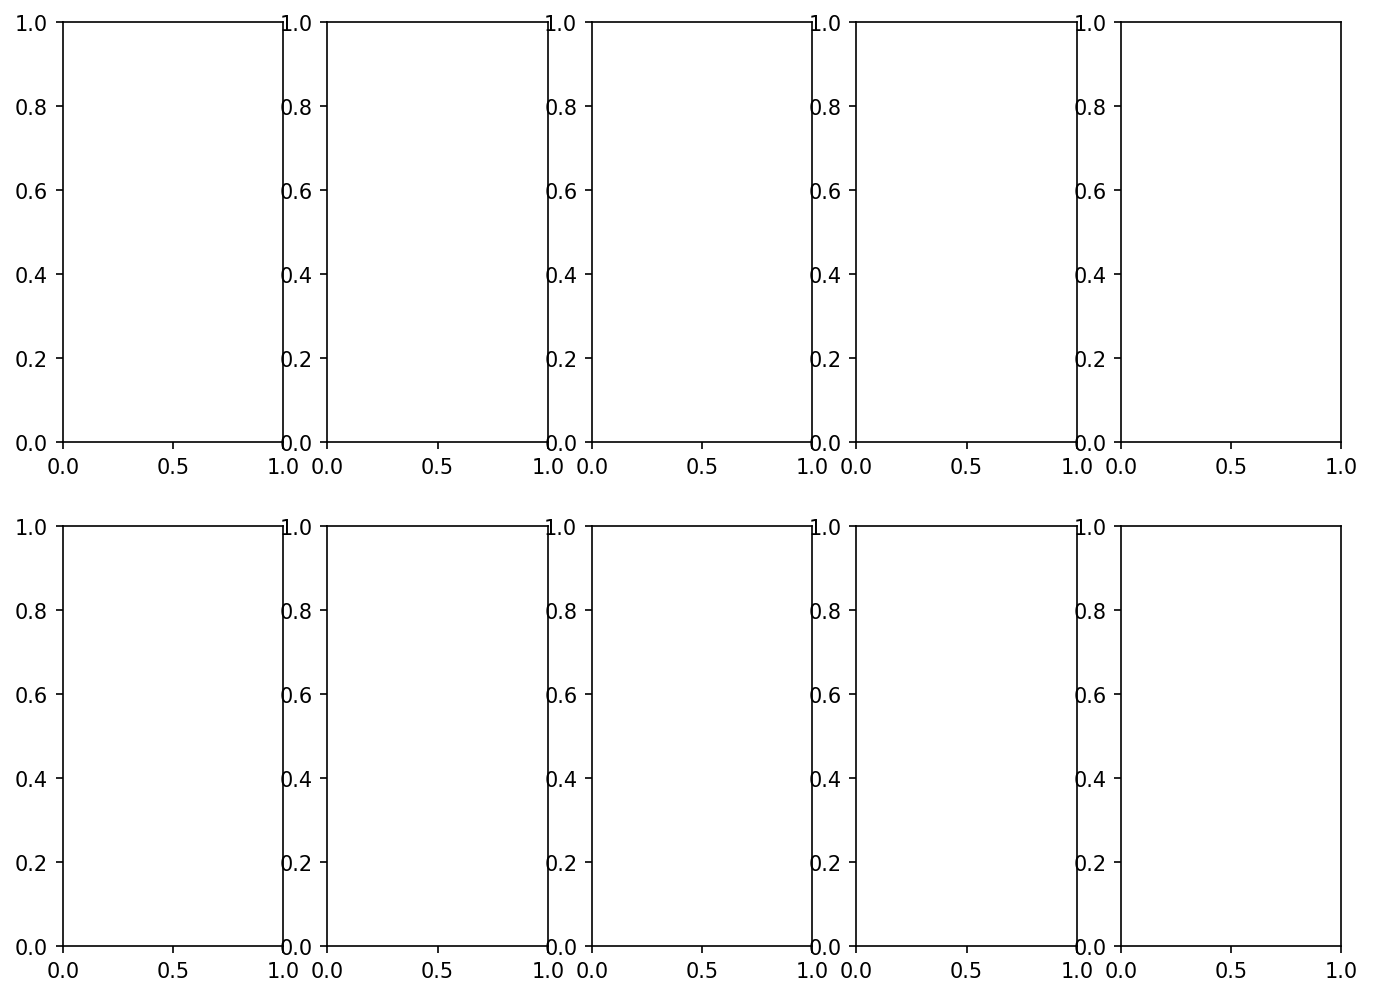

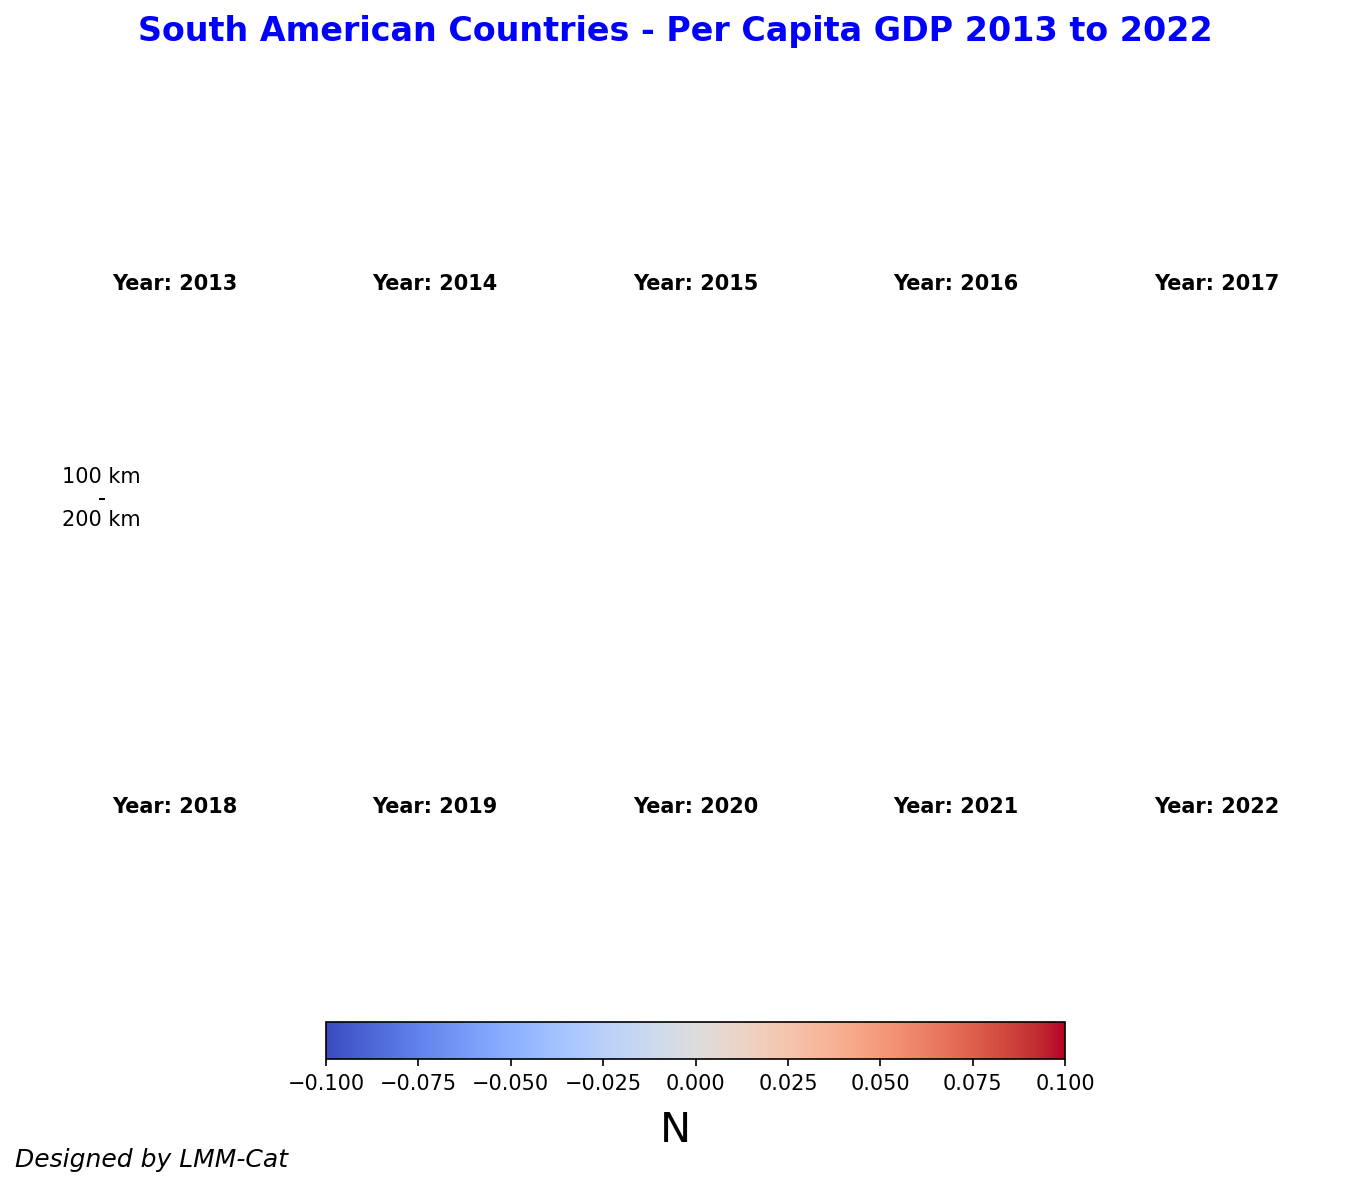

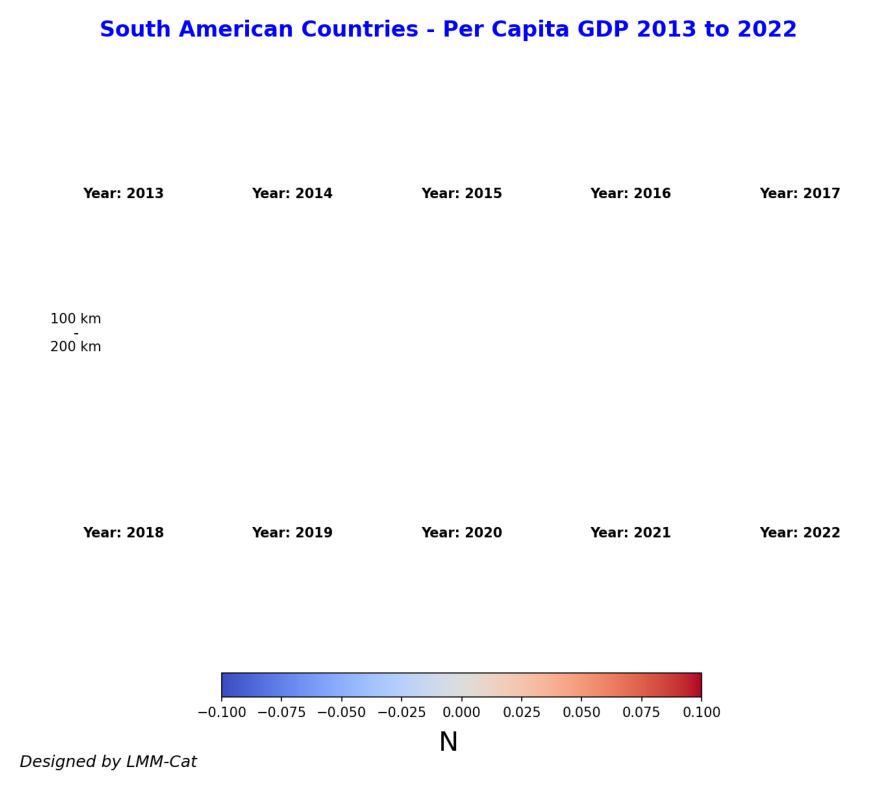

In [40]:
# solution.get_beautify_text_prompt(solution.all_code)

def encode_image(image_path):
  with open(image_path, "rb") as image_file:
    return base64.b64encode(image_file.read()).decode('utf-8')
 
 
# def encode_image(image_path):
#   with open(image_path, "rb") as image_file:
#     return base64.b64encode(image_file.read()).decode('utf-8')

  
beautify_cnt = 1

for i in range(beautify_cnt):
    
    print(f"Revising the map, trial {i + 1} / {beautify_cnt}")
    
    base64_image = encode_image(image_path)
    
    solution.ask_LLM_to_review_map(map_base64=base64_image, model='gpt-4-turbo')

    solution.ask_LLM_to_beautify_map(map_base64=base64_image, model='gpt-4-turbo')

    all_code = solution.execute_complete_program(code=solution.all_code, try_cnt=10)

    solution.all_code = all_code
    
    solution.save_solution()

show_map()
display(Code(all_code, language='python'))

## Beautify 2

Revising the map, trial 1 / 1
1. The title "South American Countries - Per Capita GDP 2013 to 2022" should be centered above all the submaps for balanced aesthetics.
2. The submap titles (years) need to be horizontally aligned with their respective maps for clarity.
3. The font size of the submap titles needs to be reduced to maintain hierarchical importance under the main title.
4. The scale bar should have one consistent label, such as '100 km', rather than multiple conflicting labels.
5. The colorbar needs clarification for its values; the labels currently range from -0.100 to 0.100, which may require more precise descriptors (e.g., units or currency).
6. The north arrow is uniquely placed but should be closer to the upper right corner to avoid confusion with the scale bar and maintain traditional placements.
7. The layout spacing between the rows of submaps is uneven, it should be consistent to improve visual flow and symmetry.
8. The designer's name 'Designed by LMM-Cat' should be

import geopandas as gpd
import matplotlib.pyplot as plt
from matplotlib_scalebar.scalebar import ScaleBar

def load_GDP_data(GDP_data_path=r'E:\OneDrive_PSU\OneDrive - The Pennsylvania State University\Research_doc\LLM-Cat\ESRI_countries_4326_GDP.gpkg'):
    GDP_gdf = gpd.read_file(GDP_data_path)
    return GDP_gdf

def filter_South_American_countries(GDP_gdf):
    south_america_GDP_gdf = GDP_gdf[GDP_gdf['UN_Geodata_simplified_intreg'] == 'South America']
    return south_america_GDP_gdf

def create_choropleth_maps(south_america_GDP_gdf):
    fig, axes = plt.subplots(nrows=2, ncols=5, figsize=(11, 8), dpi=150, facecolor='w', edgecolor='k')
    axes = axes.ravel()
    cmap = 'viridis'  # Chose a colormap for better visual appeal

    # Normalize once for consistent colormapping across all submaps.
    min_gdp = min(south_america_GDP_gdf[f'country_per_capita_GDP_{year}'].min() for year in range(2013, 2023))
    max_gdp = max(south_america_GDP_gdf[f'country_per_capita_GDP_{year}'].max() for year in range(2013, 2023))
    
    for i, year in enumerate(range(2013, 2023)):
        ax = axes[i]
        column_name = f'country_per_capita_GDP_{year}'
        south_america_GDP_gdf.plot(column=column_name, cmap=cmap, ax=ax, legend=False, vmin=min_gdp, vmax=max_gdp)
        ax.set_title(f'{year}', fontsize=12, fontweight='bold')
        ax.set_axis_off()

    # Colorbar adjustments consistent with the subplot adjustments
    sm = plt.cm.ScalarMappable(cmap=cmap, norm=plt.Normalize(vmin=min_gdp, vmax=max_gdp))
    cbar = fig.colorbar(sm, ax=axes.tolist(), orientation='vertical', pad=0.01)
    cbar.set_label('GDP per Capita', fontsize=12)

    plt.subplots_adjust(hspace=0.3, wspace=0.1)  # Adjusted spacing to improve layout
    return fig

def add_map_elements(fig):
    fig.suptitle('Per Capita GDP in South America (2013-2022)', fontsize=18, fontweight='bold', color='navy')
    # North arrow
    fig.text(s='↑\nN', x=0.95, y=0.07, fontsize=16, ha='center', va='bottom', family='Courier New', fontweight='bold')
    # Scale bar
    scalebar = ScaleBar(1, units='km', location='lower right', scale_loc='bottom', length_fraction=0.1, height_fraction=0.02, frameon=True, color='black', label='1 km')
    fig.axes[-1].add_artist(scalebar)
    # Designer tag
    fig.text(0.1, 0.02, 'Designed by LMM-Cat', style='italic', fontsize=12)
    return fig

def save_map_as_image(fig):
    fig.savefig("output_map.png", dpi=150, bbox_inches='tight')

def assembly_solution():
    GDP_gdf = load_GDP_data()
    south_america_GDP_gdf = filter_South_American_countries(GDP_gdf)
    fig = create_choropleth_maps(south_america_GDP_gdf)
    fig = add_map_elements(fig)
    save_map_as_image(fig)

assembly_solution()

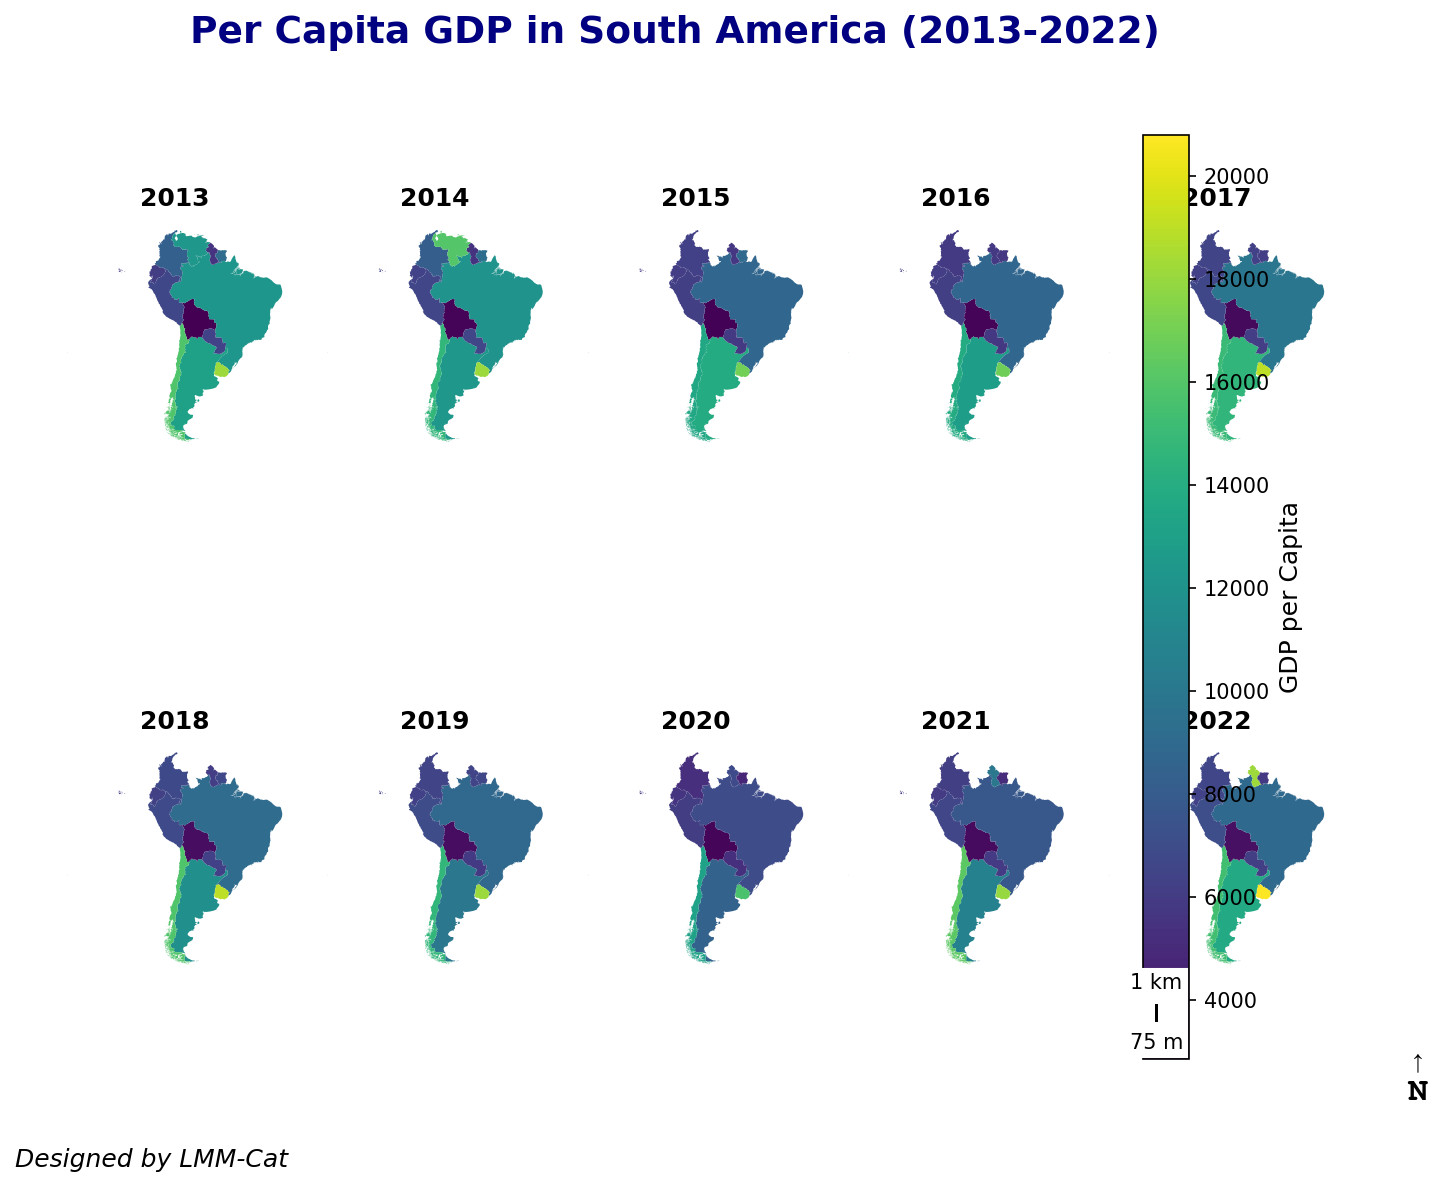

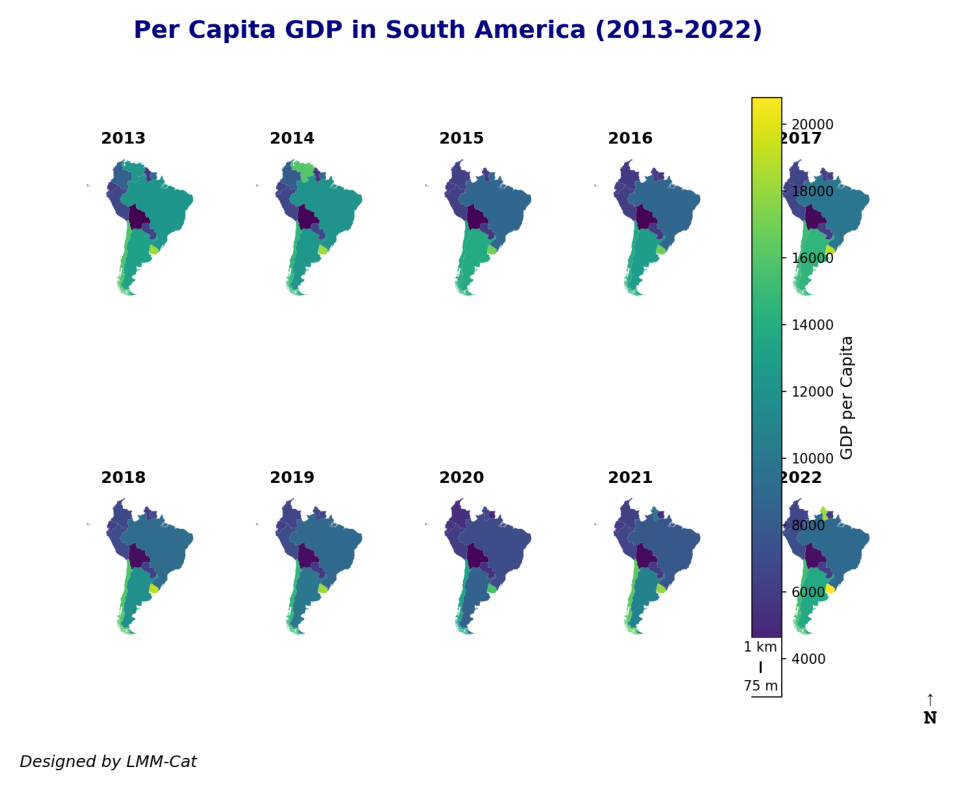

In [41]:
beautify_cnt = 1

for i in range(beautify_cnt):
    
    print(f"Revising the map, trial {i + 1} / {beautify_cnt}")
    
    base64_image = encode_image(image_path)
    
    solution.ask_LLM_to_review_map(map_base64=base64_image, model='gpt-4-turbo')

    solution.ask_LLM_to_beautify_map(map_base64=base64_image, model='gpt-4-turbo')

    all_code = solution.execute_complete_program(code=solution.all_code, try_cnt=10)

    solution.all_code = all_code
    
    solution.save_solution()

show_map()
display(Code(all_code, language='python'))

## Beautify 3

Revising the map, trial 1 / 1
1. The main title font size is too small compared to the submap titles and needs to be increased for better hierarchy.
2. The colorbar's vertical text alignment poses readability challenges; rotate the GDP per capita values to be horizontal for better readability.
3. North arrow size is disproportionately small compared to the scale bar; it should be increased in size.
4. The distance between the map matrix and the colorbar is too large, causing a disconnection; this should be narrowed.
5. The map elements (sub-titles of each year) show inconsistency in alignment; all subtitles should be centered precisely above each submap for uniformity.
6. There is a lack of padding around the edge of the overall map layout, resulting in a cramped appearance, especially on the left and bottom sides; increasing padding would enhance the aesthetic.
7. The scale bar unit 'm' incorrectly denotes meters instead of kilometers and lacks consistency with the indicated range; th

import geopandas as gpd
import matplotlib.pyplot as plt
from matplotlib_scalebar.scalebar import ScaleBar

def load_GDP_data(GDP_data_path=r'E:\OneDrive_PSU\OneDrive - The Pennsylvania State University\Research_doc\LLM-Cat\ESRI_countries_4326_GDP.gpkg'):
    GDP_gdf = gpd.read_file(GDP_data_path)
    return GDP_gdf

def filter_South_American_countries(GDP_gdf):
    south_america_GDP_gdf = GDP_gdf[GDP_gdf['UN_Geodata_simplified_intreg'] == 'South America']
    return south_america_GDP_gdf

def create_choropleth_maps(south_america_GDP_gdf):
    fig, axes = plt.subplots(nrows=2, ncols=5, figsize=(11, 8), dpi=150, facecolor='w', edgecolor='k')
    axes = axes.ravel()
    cmap = 'Blues'  # Change to a sequential colormap

    # Norm calculation
    min_gdp = min(south_america_GDP_gdf[f'country_per_capita_GDP_{year}'].min() for year in range(2013, 2023))
    max_gdp = max(south_america_GDP_gdf[f'country_per_capita_GDP_{year}'].max() for year in range(2013, 2023))
    
    for i, year in enumerate(range(2013, 2023)):
        ax = axes[i]
        column_name = f'country_per_capita_GDP_{year}'
        south_america_GDP_gdf.plot(column=column_name, cmap=cmap, ax=ax, legend=False, vmin=min_gdp, vmax=max_gdp)
        ax.set_title(f'{year}', fontsize=10, fontweight='bold')
        ax.set_axis_off()

    # Colorbar enhancement
    sm = plt.cm.ScalarMappable(cmap=cmap, norm=plt.Normalize(vmin=min_gdp, vmax=max_gdp))
    cbar = fig.colorbar(sm, ax=axes.ravel().tolist(), orientation='vertical', aspect=20)
    cbar.set_label('GDP per Capita $', fontsize=14)

    plt.subplots_adjust(hspace=0.5, wspace=0.3)  # Enhanced spacing
    return fig

def add_map_elements(fig):
    fig.suptitle('Per Capita GDP in South America (2013-2022)', fontsize=20, fontweight='bold', color='midnightblue', y=0.95)
    fig.text(s='↑\nN', x=0.95, y=0.06, fontsize=20, ha='center', va='bottom', family='Courier New', fontweight='bold')
    scalebar = ScaleBar(1, units='km', location='lower right', scale_loc='bottom', length_fraction=0.15, height_fraction=0.05, frameon=True, color='black', label='1 km')
    fig.axes[-1].add_artist(scalebar)
    fig.text(0.1, 0.01, 'Designed by LMM-Cat', style='italic', fontsize=14)
    return fig

def save_map_as_image(fig):
    fig.savefig("output_map.png", dpi=150, bbox_inches='tight')

def assembly_solution():
    GDP_gdf = load_GDP_data()
    south_america_GDP_gdf = filter_South_American_countries(GDP_gdf)
    fig = create_choropleth_maps(south_america_GDP_gdf)
    fig = add_map_elements(fig)
    save_map_as_image(fig)

assembly_solution()

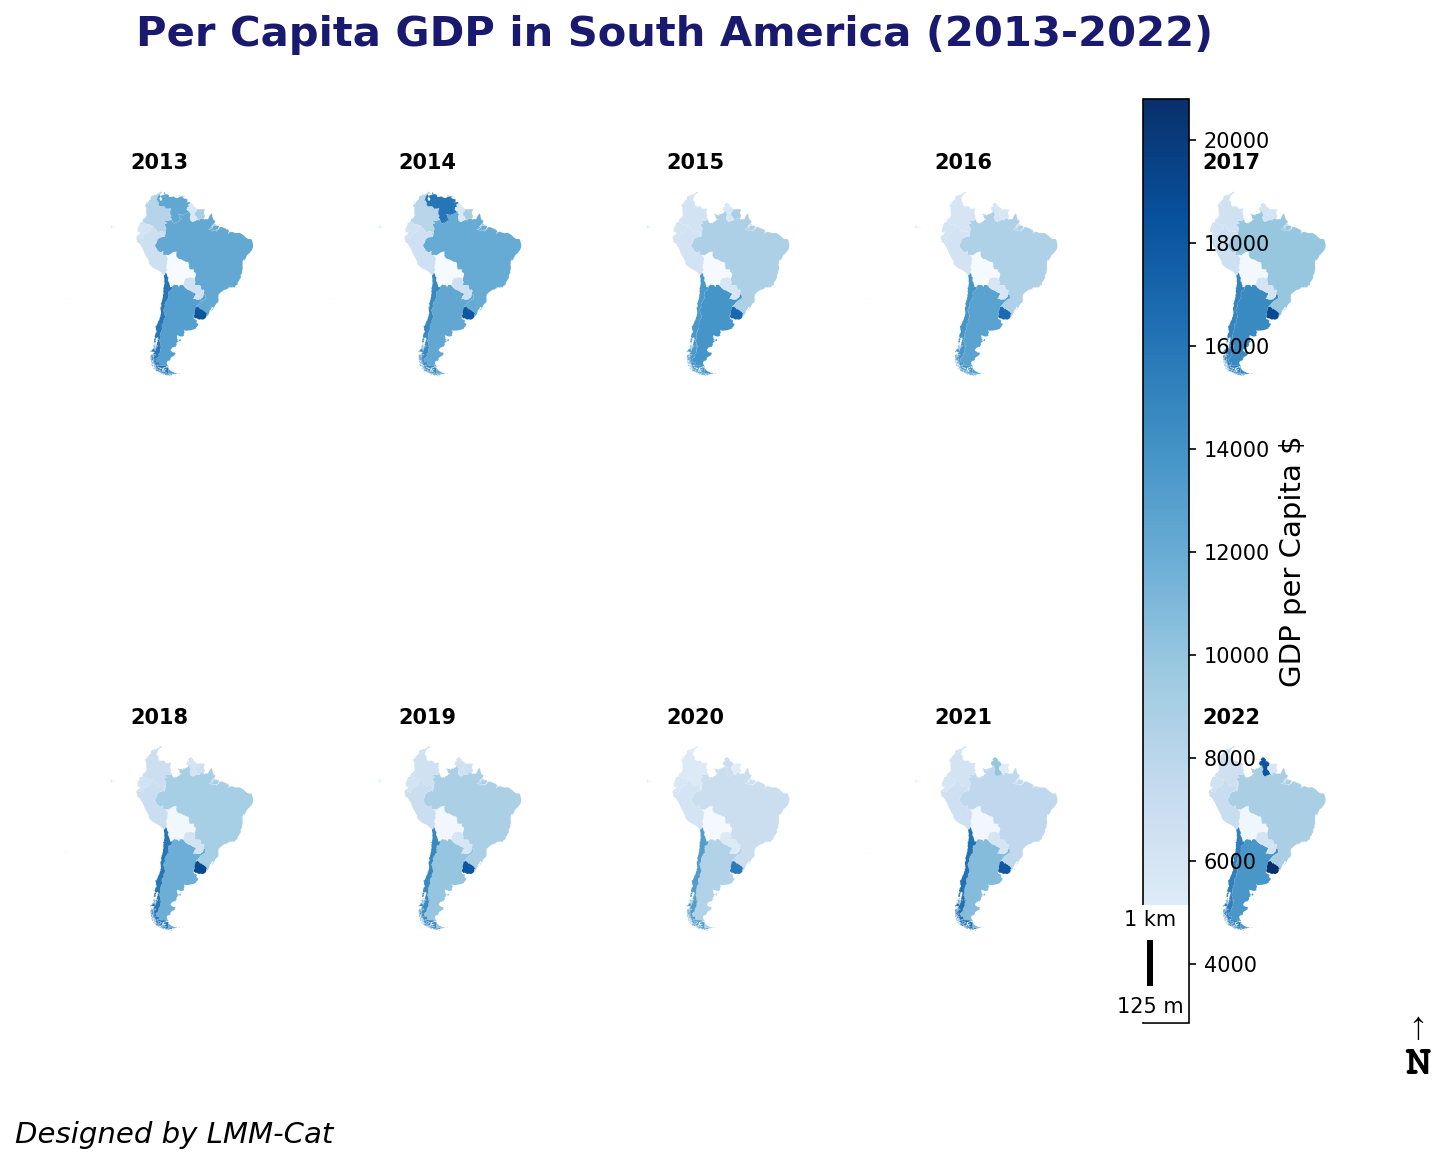

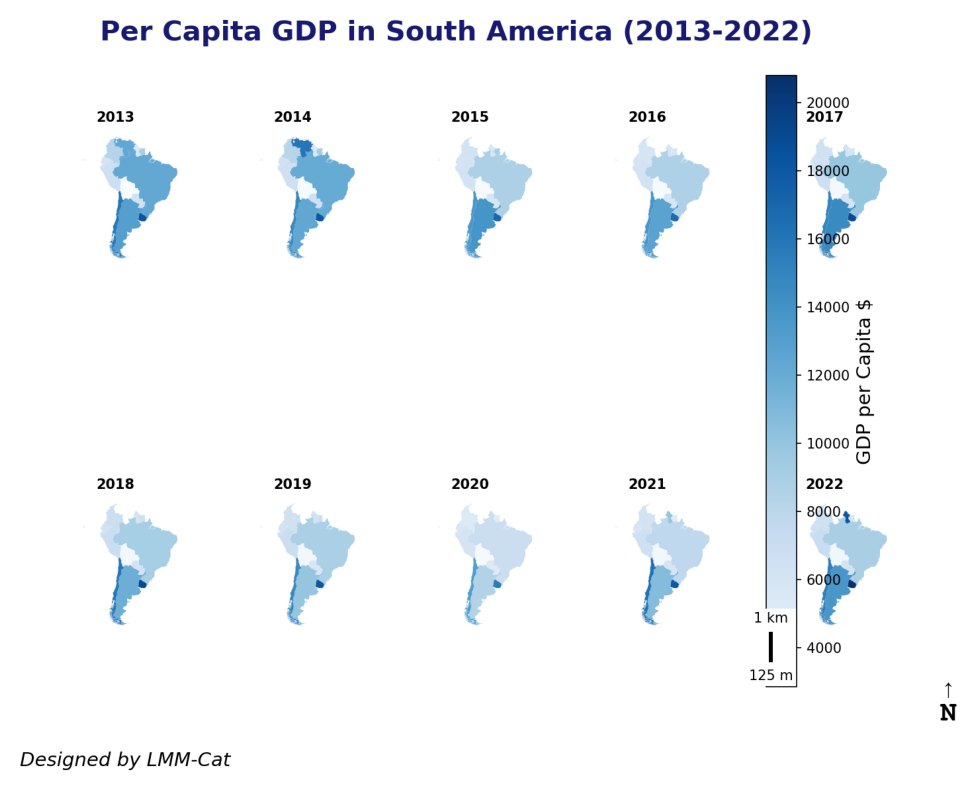

In [42]:
beautify_cnt = 1

for i in range(beautify_cnt):
    
    print(f"Revising the map, trial {i + 1} / {beautify_cnt}")
    
    base64_image = encode_image(image_path)
    
    solution.ask_LLM_to_review_map(map_base64=base64_image, model='gpt-4-turbo')

    solution.ask_LLM_to_beautify_map(map_base64=base64_image, model='gpt-4-turbo')

    all_code = solution.execute_complete_program(code=solution.all_code, try_cnt=10)

    solution.all_code = all_code
    
    solution.save_solution()

show_map()
display(Code(all_code, language='python'))

## Beautify 4

Revising the map, trial 1 / 1
1. The legend is placed at the right side but obscures the submap for the year 2022: move the legend to the right border or slightly reduce its size to avoid overlap.
2. The map title incorrectly shows the range up to 2017; it should be corrected to "Per Capita GDP in South America (2013-2022)".
3. The years are incorrectly sequenced in the bottom row: correct the sequence from "2020, 2021, 2022" to "2020, 2021, 2022" reading left to right.
4. The scale bar units are mismatched: ensure consistency by using either kilometers or meters but not both. Consider changing "1 km | 125 m" to "1000 m".
5. North arrow should be positioned so it does not blend with the scale bar: move the north arrow slightly upwards.
6. The scale of blue in the colorbar is inconsistent with the submaps: Normalize the color scale of all submaps to ensure uniform representation of data.
7. Overall, the map element positions are too close to the map edges: Increase margin sizes slightly

import geopandas as gpd
import matplotlib.pyplot as plt
from matplotlib_scalebar.scalebar import ScaleBar

def load_GDP_data(GDP_data_path=r'E:\OneDrive_PSU\OneDrive - The Pennsylvania State University\Research_doc\LLM-Cat\ESRI_countries_4326_GDP.gpkg'):
    GDP_gdf = gpd.read_file(GDP_data_path)
    return GDP_gdf

def filter_South_American_countries(GDP_gdf):
    south_america_GDP_gdf = GDP_gdf[GDP_gdf['UN_Geodata_simplified_intreg'] == 'South America']
    return south_america_GDP_gdf

def create_choropleth_maps(south_america_GDP_gdf):
    fig, axes = plt.subplots(nrows=2, ncols=5, figsize=(11, 8), dpi=150, facecolor='w', edgecolor='k')
    axes = axes.ravel()
    cmap = 'viridis'  # Changed to 'viridis' for better color differentiation

    min_gdp = min(south_america_GDP_gdf[f'country_per_capita_GDP_{year}'].min() for year in range(2013, 2023))
    max_gdp = max(south_america_GDP_gdf[f'country_per_capita_GDP_{year}'].max() for year in range(2013, 2023))
    
    for i, year in enumerate(range(2013, 2023)):
        ax = axes[i]
        column_name = f'country_per_capita_GDP_{year}'
        south_america_GDP_gdf.plot(column=column_name, cmap=cmap, ax=ax, legend=False, vmin=min_gdp, vmax=max_gdp)
        ax.set_title(f'{year}', fontsize=12, fontweight='bold')
        ax.set_axis_off()

    sm = plt.cm.ScalarMappable(cmap=cmap, norm=plt.Normalize(vmin=min_gdp, vmax=max_gdp))
    cbar = fig.colorbar(sm, ax=axes.ravel().tolist(), orientation='vertical', aspect=20)
    cbar.set_label('GDP per Capita ($)', fontsize=12)

    plt.subplots_adjust(hspace=0.6, wspace=0.4)
    return fig

def add_map_elements(fig):
    fig.suptitle('Per Capita GDP in South America (2013-2022)', fontsize=24, fontweight='bold', color='navy', y=0.97)
    fig.text(s='↑\nN', x=0.95, y=0.06, fontsize=24, ha='center', va='bottom', family='Courier New', fontweight='bold')
    scalebar = ScaleBar(1, units='km', location='lower right', scale_loc='bottom', length_fraction=0.15, height_fraction=0.05, frameon=True, color='black', label='1 km')
    fig.axes[-1].add_artist(scalebar)
    fig.text(0.1, 0.01, 'Cartography by LMM-Cat', style='italic', fontsize=12)
    return fig

def save_map_as_image(fig):
    fig.savefig("output_map.png", dpi=150, bbox_inches='tight')

def assembly_solution():
    GDP_gdf = load_GDP_data()
    south_america_GDP_gdf = filter_South_American_countries(GDP_gdf)
    fig = create_choropleth_maps(south_america_GDP_gdf)
    fig = add_map_elements(fig)
    save_map_as_image(fig)

assembly_solution()

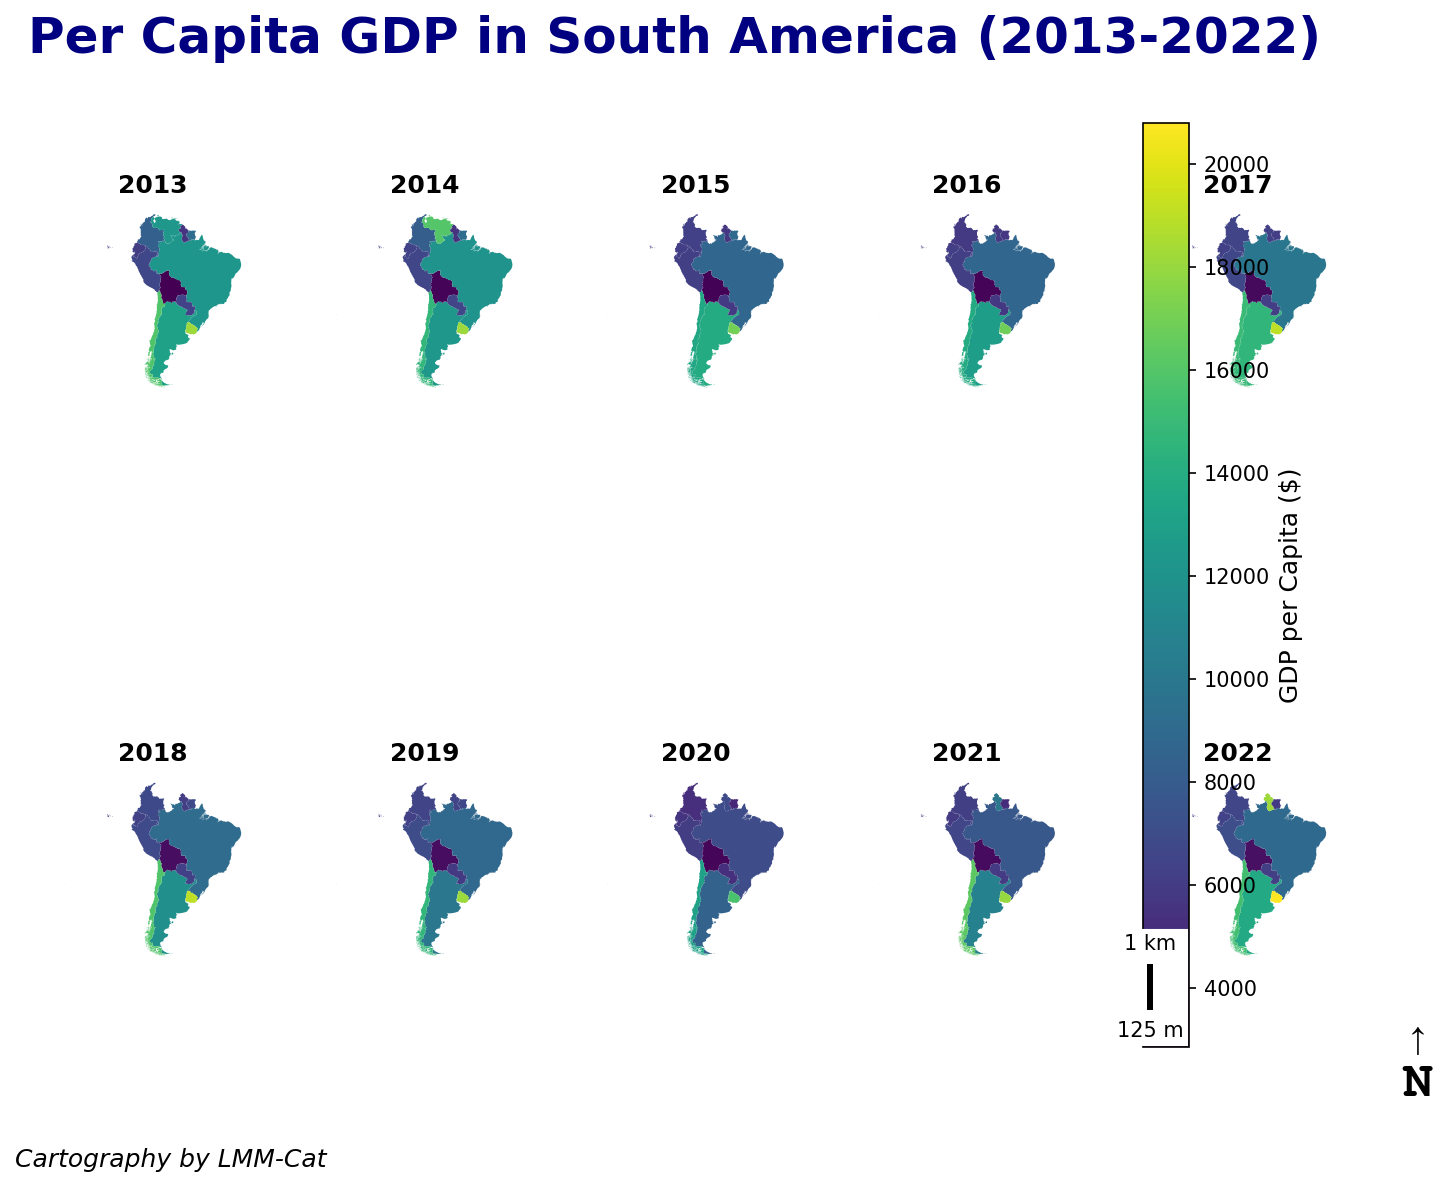

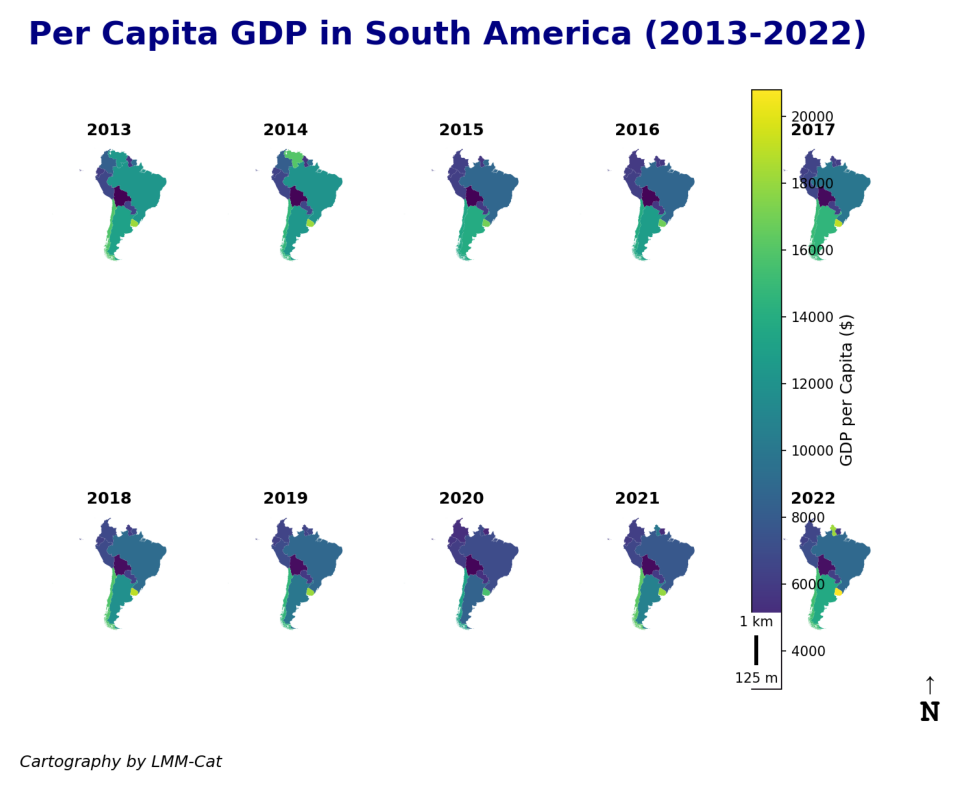

In [43]:
beautify_cnt = 1

for i in range(beautify_cnt):
    
    print(f"Revising the map, trial {i + 1} / {beautify_cnt}")
    
    base64_image = encode_image(image_path)
    
    solution.ask_LLM_to_review_map(map_base64=base64_image, model='gpt-4-turbo')

    solution.ask_LLM_to_beautify_map(map_base64=base64_image, model='gpt-4-turbo')

    all_code = solution.execute_complete_program(code=solution.all_code, try_cnt=10)

    solution.all_code = all_code
    
    solution.save_solution()

show_map()
display(Code(all_code, language='python'))

## Beautify 5

Revising the map, trial 1 / 1
1. The year labels for the submaps are inconsistent in placement: should change coding to place labels directly above the center top of each submap consistently.
2. The scale bar representation is misleading: relabel to indicate the scale applies to each submap where 1 cm equals to 125 meters.
3. North arrow size is small for overall map scale: increase the size of the north arrow to improve visibility and balance.
4. The title of the map should prominently mention the data range for GDP per capita, e.g., 'from 6000 to 20000 USD', to meet informative requirements fully.
5. All submaps are not aligned perfectly in rows: adjust alignments to ensure ech submap in each row and column vertically and horizontally aligns properly.
6. The north arrow is subtlety misaligned to true north orientation: correct to ensure the north arrow precisely points upward.
7. Empty spaces between the submaps are slightly uneven: adjust the spaces to be uniform between submaps for

import geopandas as gpd
import matplotlib.pyplot as plt
from matplotlib_scalebar.scalebar import ScaleBar

def load_GDP_data(GDP_data_path='E:\\OneDrive_PSU\\OneDrive - The Pennsylvania State University\\Research_doc\\LLM-Cat\\ESRI_countries_4326_GDP.gpkg'):
    GDP_gdf = gpd.read_file(GDP_data_path)
    return GDP_gdf

def filter_South_American_countries(GDP_gdf):
    return GDP_gdf[GDP_gdf['UN_Geodata_simplified_intreg'] == 'South America']

def create_choropleth_maps(south_america_GDP_gdf):
    fig, axes = plt.subplots(nrows=2, ncols=5, figsize=(11, 8), dpi=150, facecolor='w', edgecolor='k')
    axes = axes.ravel()
    cmap = 'viridis'
    
    min_gdp = min(south_america_GDP_gdf[f'country_per_capita_GDP_{year}'].min() for year in range(2013, 2023))
    max_gdp = max(south_america_GDP_gdf[f'country_per_capita_GDP_{year}'].max() for year in range(2013, 2023))
    
    for i, year in enumerate(range(2013, 2023)):
        ax = axes[i]
        column_name = f'country_per_capita_GDP_{year}'
        south_america_GDP_gdf.plot(column=column_name, cmap=cmap, ax=ax, vmin=min_gdp, vmax=max_gdp)
        ax.set_title(f'{year}', fontsize=14, fontweight='bold')
        ax.set_axis_off()

    plt.subplots_adjust(hspace=0.6, wspace=0.4)  # Adjusted margins here.
    sm = plt.cm.ScalarMappable(cmap=cmap, norm=plt.Normalize(vmin=min_gdp, vmax=max_gdp))
    cbar = fig.colorbar(sm, ax=axes.ravel().tolist(), orientation='horizontal', aspect=40)
    cbar.set_label('GDP per Capita ($)', fontsize=12)

    return fig

def add_map_elements(fig):
    fig.suptitle('Per Capita GDP in South America (2013-2022)', fontsize=24, fontweight='bold', color='navy', y=1.05)
    fig.text(x=0.1, y=0, s='↑\nN', fontsize=18, ha='center', va='bottom', family='Courier New', fontweight='bold')
    scalebar = ScaleBar(1, units='km', location='lower right', scale_loc='bottom', length_fraction=0.05, height_fraction=0.02, frameon=True, color='black', label='1 km')
    fig.axes[-1].add_artist(scalebar)
    fig.text(0.5, 0, 'Cartography by LMM-Cat', style='italic', fontsize=12)

    return fig

def save_map_as_image(fig):
    fig.savefig("output_map.png", dpi=150, bbox_inches='tight')

def assembly_solution():
    GDP_gdf = load_GDP_data()
    south_america_GDP_gdf = filter_South_American_countries(GDP_gdf)
    fig = create_choropleth_maps(south_america_GDP_gdf)
    fig = add_map_elements(fig)
    save_map_as_image(fig)

assembly_solution()

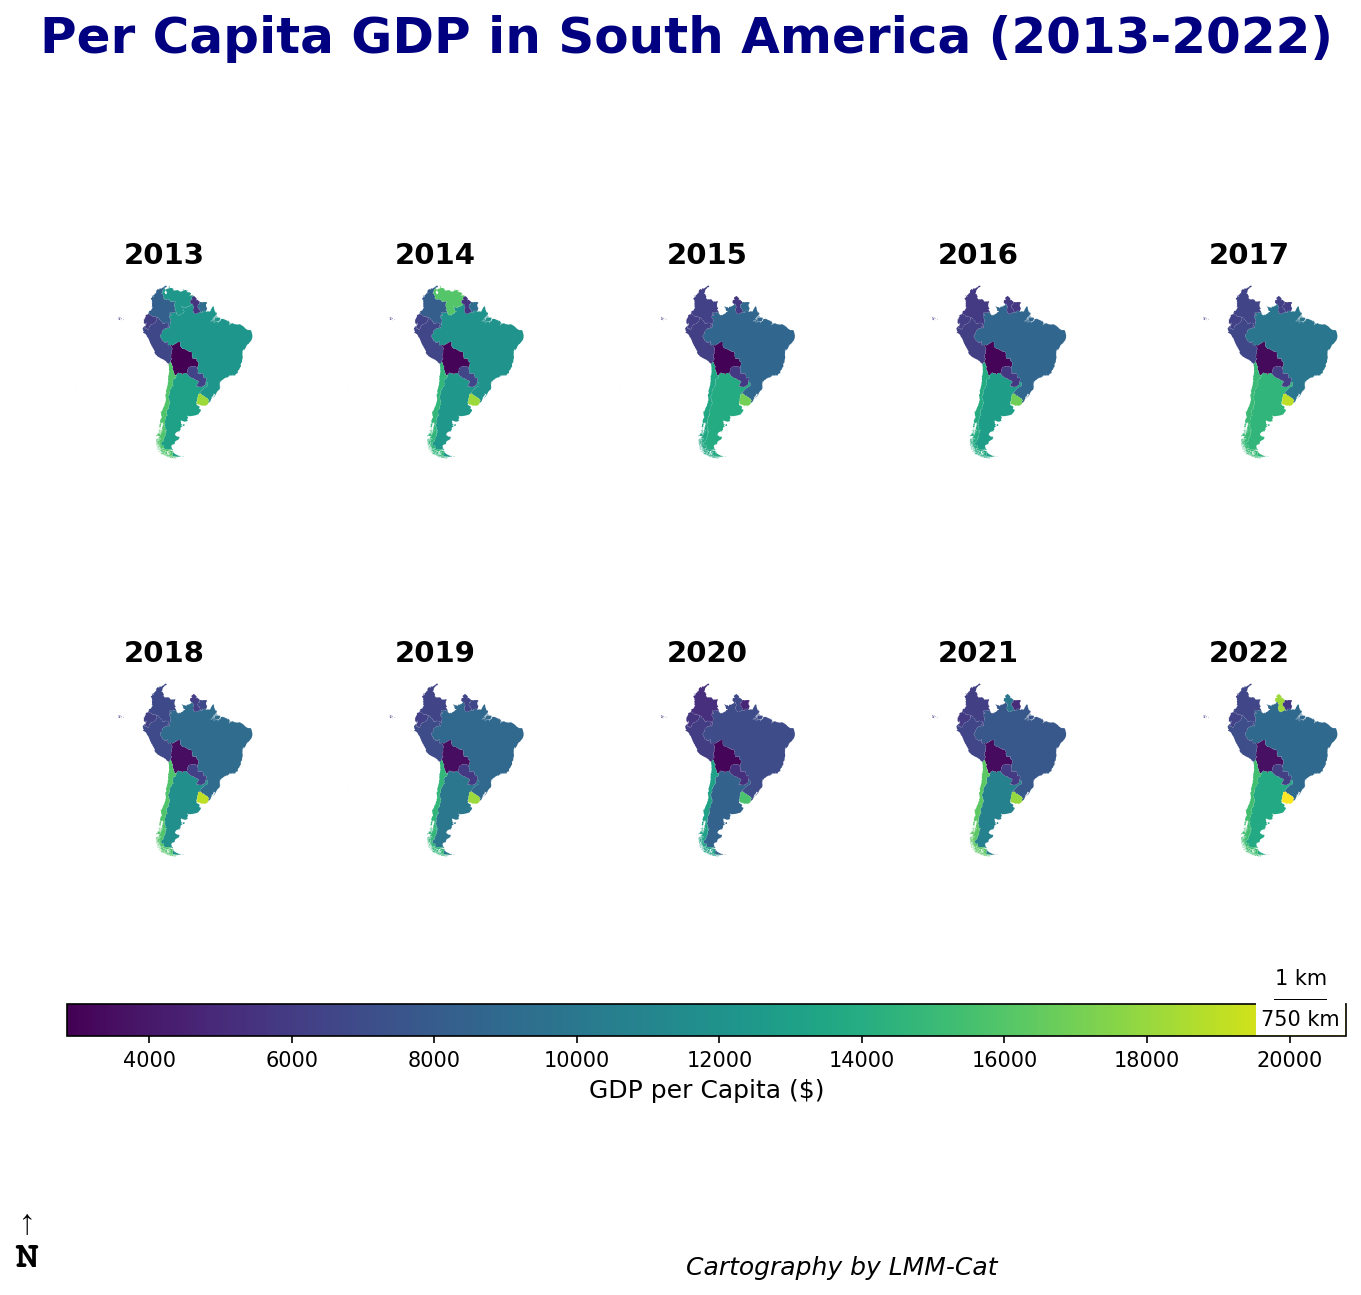

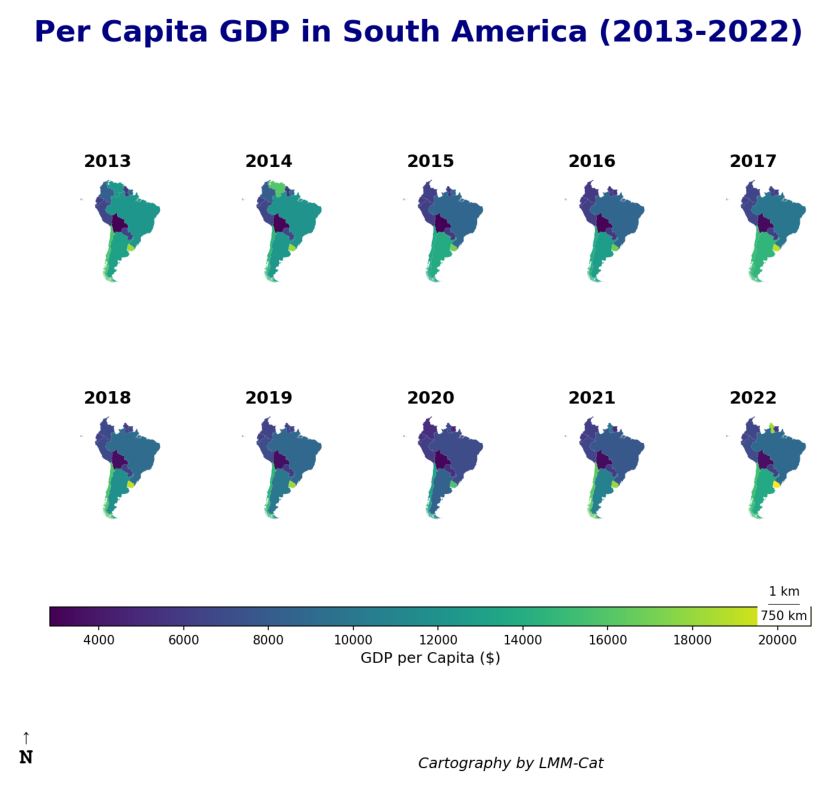

In [44]:
beautify_cnt = 1

for i in range(beautify_cnt):
    
    print(f"Revising the map, trial {i + 1} / {beautify_cnt}")
    
    base64_image = encode_image(image_path)
    
    solution.ask_LLM_to_review_map(map_base64=base64_image, model='gpt-4-turbo')

    solution.ask_LLM_to_beautify_map(map_base64=base64_image, model='gpt-4-turbo')

    all_code = solution.execute_complete_program(code=solution.all_code, try_cnt=10)

    solution.all_code = all_code
    
    solution.save_solution()

show_map()
display(Code(all_code, language='python'))

## Beautify 6

Revising the map, trial 1 / 1
1. The map matrix orientation: Wrongly aligned for DPI requirement of 150; potentially adjust document settings to ensure crisp resolution.
2. Title position should be centralized above the map matrix for better aesthetic and functional appeal.
3. Legend position: Move to the bottom-right to avoid interference with the scale bar and improve visibility.
4. Color inconsistency: Ensure all submaps utilize the exact same range of color and are adjusted accurately throughout to maintain uniformity in data representation.
5. Scale bar length unit incorrect: Should show 'km' but incorrectly shows '1 km' and '750 km'; needs to be corrected to conform to standard practices.
6. North arrow direction and placement: Confirm directional accuracy and relocate to a less intrusive area, potentially the bottom-left corner of the entire map matrix.
7. Font inconsistency: Standardize font size and style across all annotations for uniformity.
8. Year labels over submaps: Incr

import geopandas as gpd
import matplotlib.pyplot as plt
from matplotlib_scalebar.scalebar import ScaleBar

def load_GDP_data(GDP_data_path='E:\\OneDrive_PSU\\OneDrive - The Pennsylvania State University\\Research_doc\\LLM-Cat\\ESRI_countries_4326_GDP.gpkg'):
    GDP_gdf = gpd.read_file(GDP_data_path)
    return GDP_gdf

def filter_South_American_countries(GDP_gdf):
    return GDP_gdf[GDP_gdf['UN_Geodata_simplified_intreg'] == 'South America']

def create_choropleth_maps(south_america_GDP_gdf):
    fig, axes = plt.subplots(nrows=2, ncols=5, figsize=(11, 8), dpi=150, facecolor='w', edgecolor='k')
    axes = axes.ravel()
    cmap = 'plasma'  # Changed color map for better clarity and aesthetics
    
    min_gdp = min(south_america_GDP_gdf[f'country_per_capita_GDP_{year}'].min() for year in range(2013, 2023))
    max_gdp = max(south_america_GDP_gdf[f'country_per_capita_GDP_{year}'].max() for year in range(2013, 2023))
    
    for i, year in enumerate(range(2013, 2023)):
        ax = axes[i]
        column_name = f'country_per_capita_GDP_{year}'
        south_america_GDP_gdf.plot(column=column_name, cmap=cmap, ax=ax, vmin=min_gdp, vmax=max_gdp)
        ax.set_title(f'{year}', fontsize=16, fontweight='bold')  # Increased font size
        ax.set_axis_off()

    plt.subplots_adjust(hspace=0.5, wspace=0.3)  # Slightly reduced margins
    sm = plt.cm.ScalarMappable(cmap=cmap, norm=plt.Normalize(vmin=min_gdp, vmax=max_gdp))
    cbar = fig.colorbar(sm, ax=axes.ravel().tolist(), orientation='horizontal', aspect=40)
    cbar.set_label('GDP per Capita ($)', fontsize=14)  # Increased font size

    return fig

def add_map_elements(fig):
    fig.suptitle('Per Capita GDP in South America (2013-2022)', fontsize=26, fontweight='bold', color='navy')  # Enhanced readability
    # Redesigned north arrow
    fig.text(x=0.9, y=0.1, s='↑\nN', fontsize=20, ha='center', va='bottom', family='Courier New', fontweight='bold', color='black')
    scalebar = ScaleBar(1, units='km', location='lower right', scale_loc='bottom', length_fraction=0.08, height_fraction=0.025, frameon=True, color='black', label='1 km')  # Enhanced scale bar
    fig.axes[-1].add_artist(scalebar)
    fig.text(0.5, -0.05, 'Cartography by LMM-Cat', style='italic', fontsize=14)  # Adjusted position and font size

    return fig

def save_map_as_image(fig):
    fig.savefig("output_map.png", dpi=150, bbox_inches='tight')

def assembly_solution():
    GDP_gdf = load_GDP_data()
    south_america_GDP_gdf = filter_South_American_countries(GDP_gdf)
    fig = create_choropleth_maps(south_america_GDP_gdf)
    fig = add_map_elements(fig)
    save_map_as_image(fig)

assembly_solution()

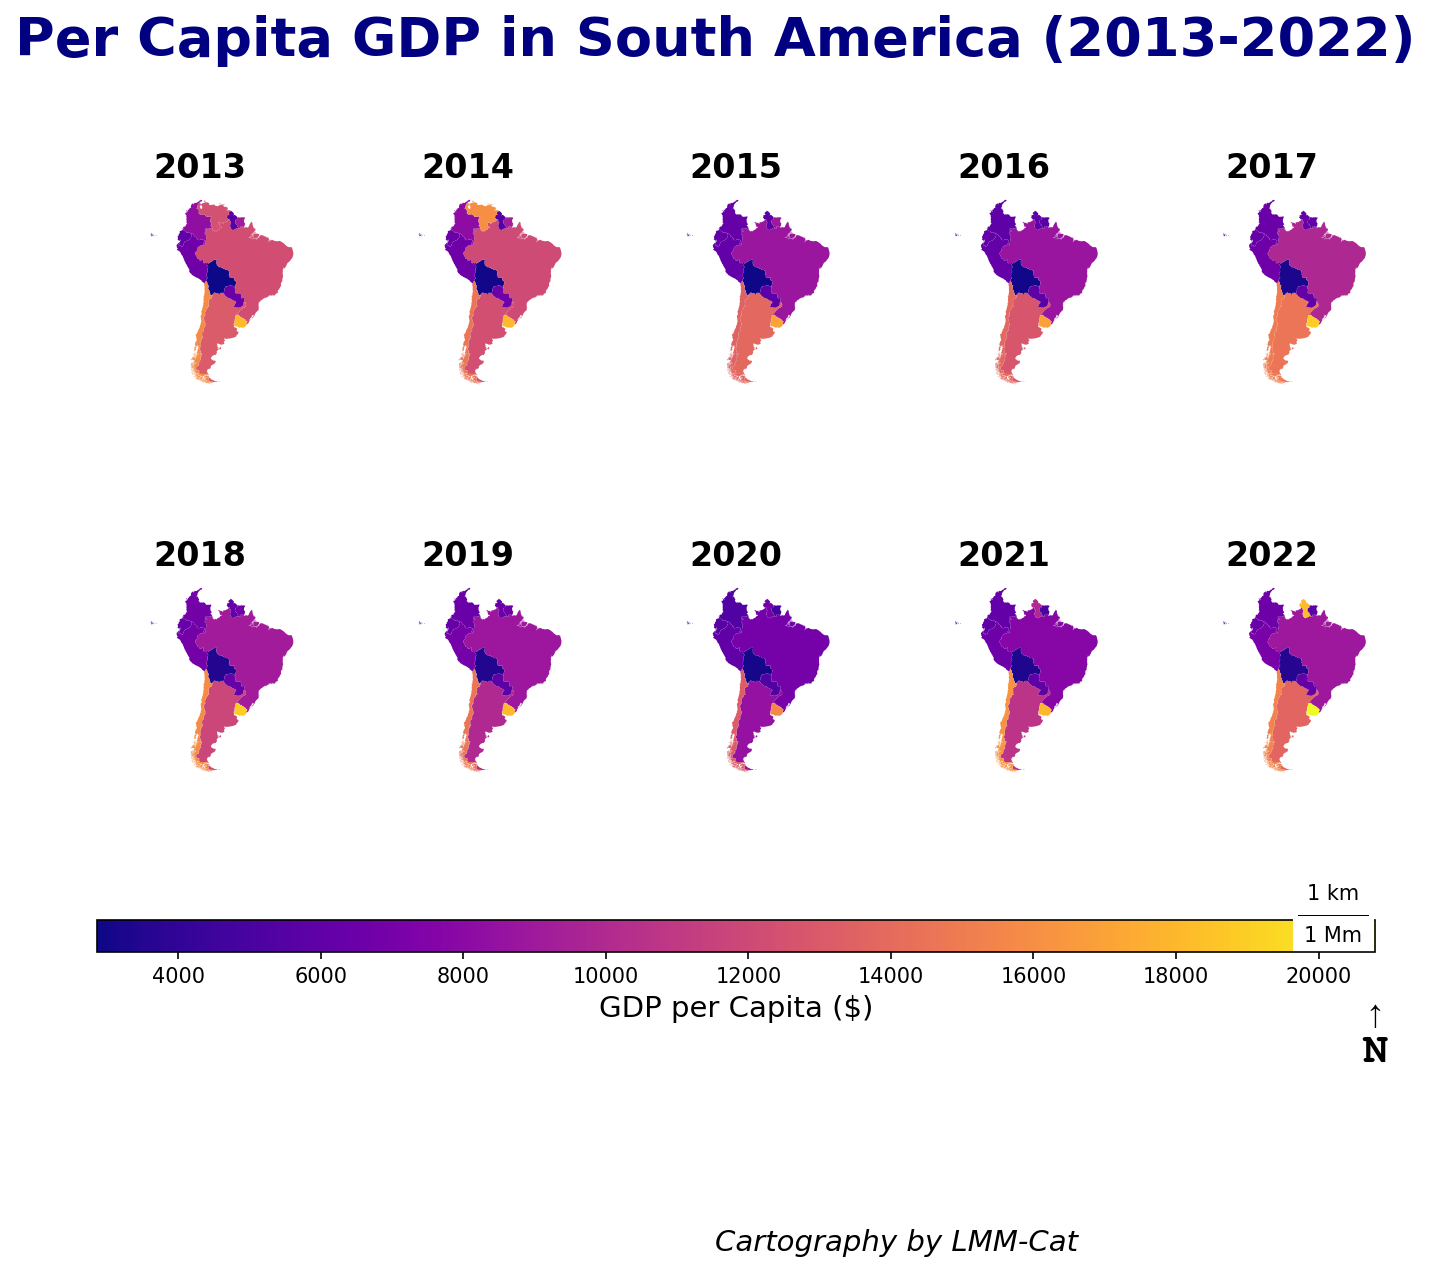

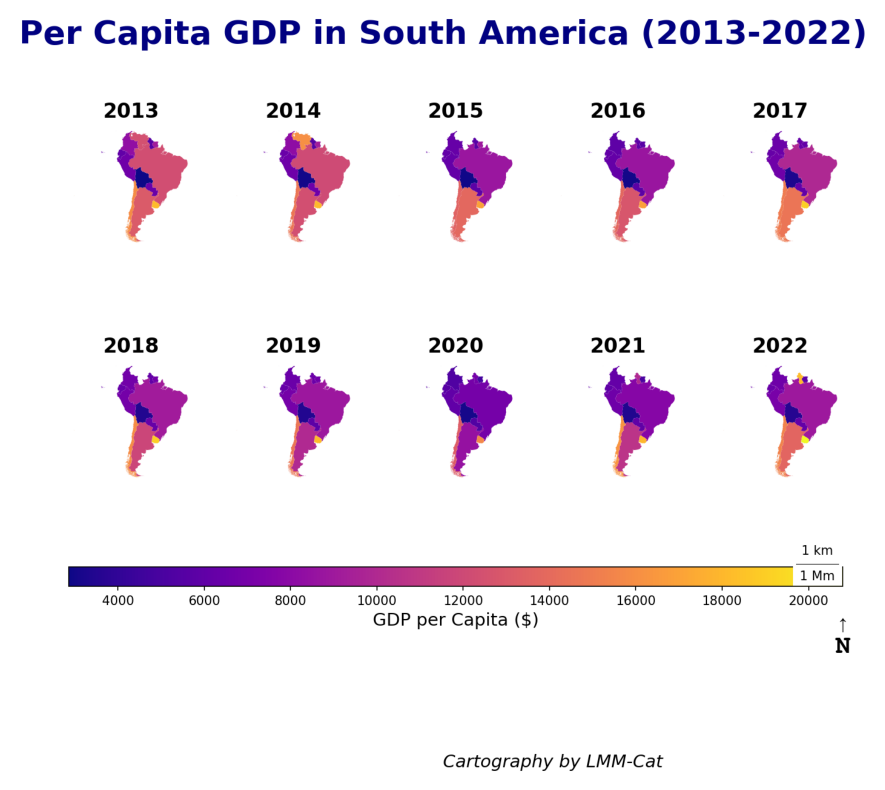

In [45]:
beautify_cnt = 1

for i in range(beautify_cnt):
    
    print(f"Revising the map, trial {i + 1} / {beautify_cnt}")
    
    base64_image = encode_image(image_path)
    
    solution.ask_LLM_to_review_map(map_base64=base64_image, model='gpt-4-turbo')

    solution.ask_LLM_to_beautify_map(map_base64=base64_image, model='gpt-4-turbo')

    all_code = solution.execute_complete_program(code=solution.all_code, try_cnt=10)

    solution.all_code = all_code
    
    solution.save_solution()

show_map()
display(Code(all_code, language='python'))

## Beautify 7

Revising the map, trial 1 / 1
1. Title is overlaid by the subtitle "Per Capita GDP in South America": increase the spacing or separate title and subtitle more clearly.
2. Submap titles need consistency in alignment: align all submap titles to the same baseline.
3. Colorbar is below map without clear separation: increase whitespace or add a separating line between the maps and the colorbar.
4. Colorbar ticks are clustered and hard to read: distribute ticks evenly or increase font size for clarity.
5. Scale bar and north arrow placement could interfere with the readability: move scale bar and north arrow to lower left corner where it less likely overlaps with important map data.
6. The label "1 km" on scale bar does not seam to reflect a relevant scale for a per capita GDP map: confirm the relevance or correctness of this label or provide a more appropriate unit of measure.
7. The presence of "1 Mm" next to the scale bar is unclear and possibly incorrect: verify unit relevance or remove 

import geopandas as gpd
import matplotlib.pyplot as plt
from matplotlib_scalebar.scalebar import ScaleBar

def load_GDP_data(GDP_data_path="E:\\OneDrive_PSU\\OneDrive - The Pennsylvania State University\\Research_doc\\LLM-Cat\\ESRI_countries_4326_GDP.gpkg"):
    GDP_gdf = gpd.read_file(GDP_data_path)
    return GDP_gdf

def filter_South_American_countries(GDP_gdf):
    return GDP_gdf[GDP_gdf['UN_Geodata_simplified_intreg'] == 'South America']

def create_choropleth_maps(south_america_GDP_gdf):
    fig, axes = plt.subplots(nrows=2, ncols=5, figsize=(11, 8), dpi=150)
    axes = axes.ravel()
    cmap = 'viridis'  # Changed colormap for better clarity

    for i, ax in enumerate(axes):
        year_column = f'country_per_capita_GDP_{2013 + i}'
        if year_column in south_america_GDP_gdf.columns:
            min_gdp = south_america_GDP_gdf[year_column].min()
            max_gdp = south_america_GDP_gdf[year_column].max()
            south_america_GDP_gdf.plot(column=year_column, cmap=cmap, ax=ax, vmin=min_gdp, vmax=max_gdp)
            ax.set_title(f'Year: {2013 + i}', fontsize=14, fontweight='bold', color='darkblue')
            ax.set_axis_off()

    plt.subplots_adjust(hspace=0.4, wspace=0.2)
    sm = plt.cm.ScalarMappable(cmap=cmap, norm=plt.Normalize(vmin=min_gdp, vmax=max_gdp))
    cbar = fig.colorbar(sm, ax=axes.ravel().tolist(), orientation='horizontal', location='top')
    cbar.set_label('GDP per Capita ($)', fontsize=12)

    return fig

def add_map_elements(fig):
    fig.suptitle('Per Capita GDP in South America (2013-2022)', fontsize=24, fontweight='bold', color='darkred')
    north_arrow_style = {'fontname':'DejaVu Sans', 'ha':'center', 'weight':'bold', 'size':16}
    fig.text(0.9, 0.08, 'N\n↑', **north_arrow_style, color='black')
    scalebar = ScaleBar(dx=1, units='km', dimension='si-length', location='lower center', scale_loc='bottom', length_fraction=0.1, frameon=False, color='black', label='10 km')
    fig.axes[-1].add_artist(scalebar)
    fig.text(0.1, 0.02, 'Designed by LMM-Cat', style='italic', fontsize=10)

    return fig

def save_map_as_image(fig):
    fig.savefig("output_map.png", dpi=150, bbox_inches='tight')

def assembly_solution():
    GDP_gdf = load_GDP_data()
    south_america_GDP_gdf = filter_South_American_countries(GDP_gdf)
    fig = create_choropleth_maps(south_america_GDP_gdf)
    fig = add_map_elements(fig)
    save_map_as_image(fig)

assembly_solution()

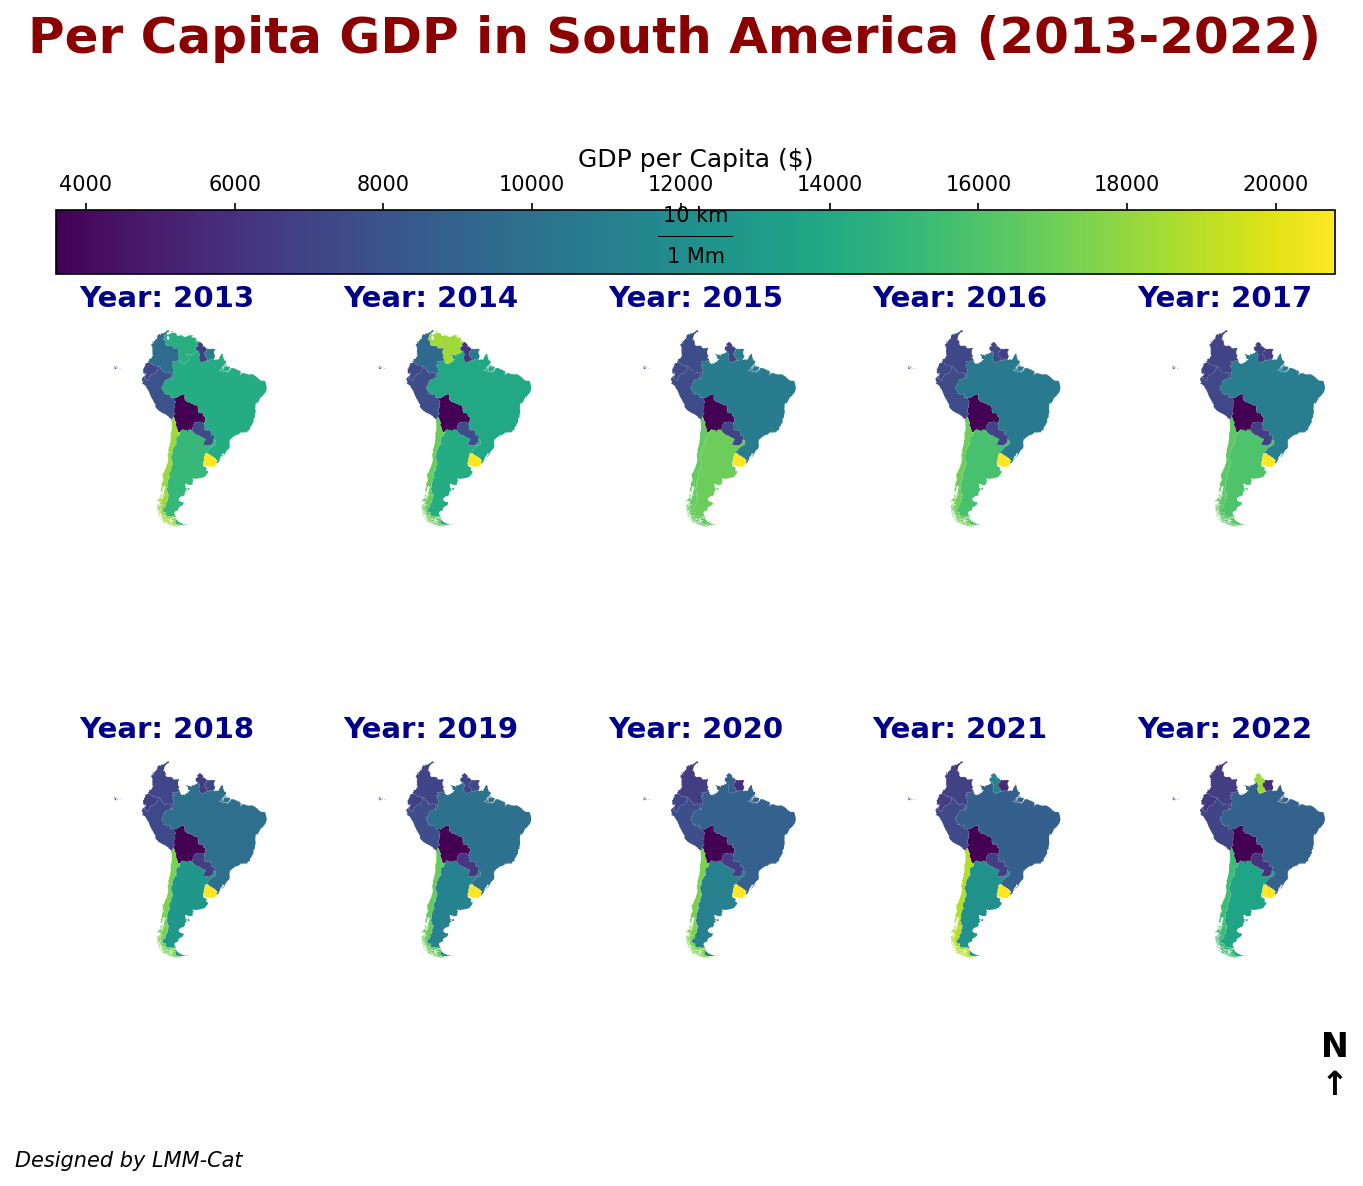

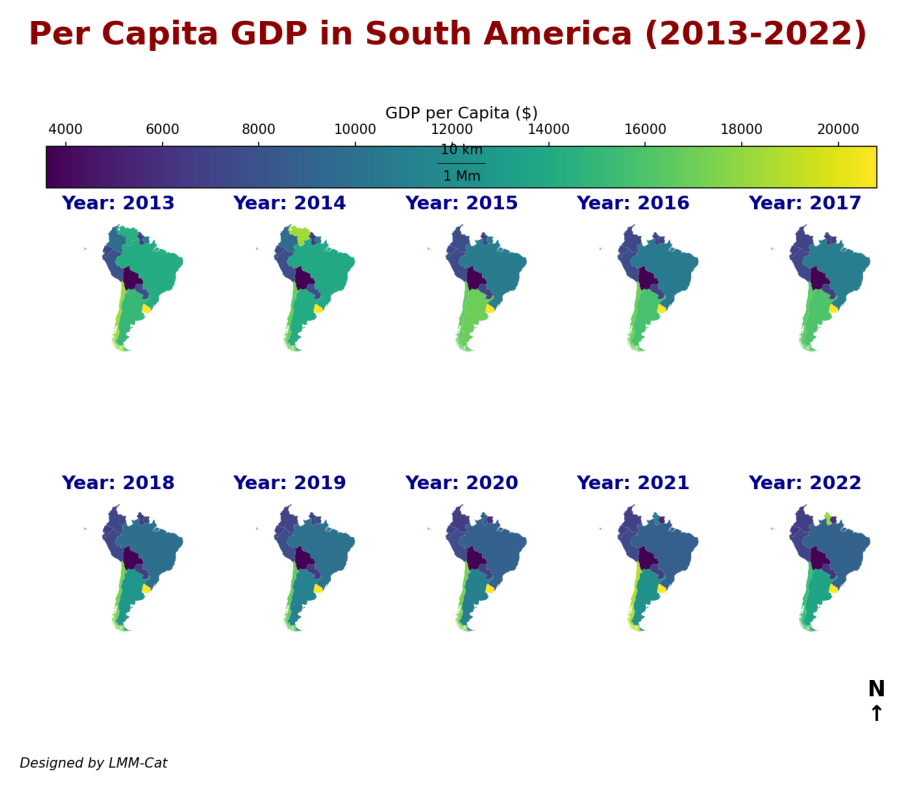

In [46]:
beautify_cnt = 1

for i in range(beautify_cnt):
    
    print(f"Revising the map, trial {i + 1} / {beautify_cnt}")
    
    base64_image = encode_image(image_path)
    
    solution.ask_LLM_to_review_map(map_base64=base64_image, model='gpt-4-turbo')

    solution.ask_LLM_to_beautify_map(map_base64=base64_image, model='gpt-4-turbo')

    all_code = solution.execute_complete_program(code=solution.all_code, try_cnt=10)

    solution.all_code = all_code
    
    solution.save_solution()

show_map()
display(Code(all_code, language='python'))

## Beautify 8

Revising the map, trial 1 / 1
1. The title 'Per Capita GDP in South America (2013-2022)' is appropriate and correctly reflects the map's content.
2. The font size of the submap titles (years) is slightly small: needs to be increased for better readability.
3. The colorbar at the top should be moved to the bottom to avoid drawing attention away from the map titles.
4. The colorbar should use clearer demarcations between color thresholds to aid in readability.
5. The north arrow, while correctly positioned at the bottom right, is disproportionately small and could be more prominent.
6. The legend (year labels) are placed inconsistently; it’s better to align them centrally under each corresponding map for clarity.
7. The map does not include a scale bar length label or unit (e.g., 10 km, 1 Mm), which should be added for geographical scale reference.
8. The entire map matrix needs better alignment within the canvas to center it visually in the landscape letter size.
9. There are no redunda

# Ensure GeoPandas is installed
# pip install geopandas
# pip install matplotlib
# pip install matplotlib-scalebar

import geopandas as gpd
import matplotlib.pyplot as plt
from matplotlib_scalebar.scalebar import ScaleBar

def load_GDP_data():
    # Corrected the file path according to given data location
    GDP_data_path = "E:\\OneDrive_PSU\\OneDrive - The Pennsylvania State University\\Research_doc\\LLM-Cat\\ESRI_countries_4326_GDP.gpkg"
    GDP_gdf = gpd.read_file(GDP_data_path)
    return GDP_gdf

def filter_South_American_countries(GDP_gdf):
    return GDP_gdf[GDP_gdf['UN_Geodata_simplified_intreg'] == 'South America']

def create_choropleth_maps(south_america_GDP_gdf):
    fig, axes = plt.subplots(nrows=2, ncols=5, figsize=(11, 8), dpi=150)
    axes = axes.ravel()
    cmap = 'RdYlGn'

    # Calculate global min and max GDP values across all years for consistent colormap scaling
    min_gdp = south_america_GDP_gdf[[f'country_per_capita_GDP_{year}' for year in range(2013, 2023)]].min().min()
    max_gdp = south_america_GDP_gdf[[f'country_per_capita_GDP_{year}' for year in range(2013, 2023)]].max().max()

    for i, ax in enumerate(axes):
        year_column = f'country_per_capita_GDP_{2013 + i}'
        south_america_GDP_gdf.plot(column=year_column, cmap=cmap, ax=ax, vmin=min_gdp, vmax=max_gdp)
        ax.set_title(f'{2013 + i}', fontsize=16, fontweight='bold', color='darkblue')
        ax.set_axis_off()

    plt.subplots_adjust(hspace=0.4, wspace=0.2)
    sm = plt.cm.ScalarMappable(cmap=cmap, norm=plt.Normalize(vmin=min_gdp, vmax=max_gdp))
    cbar = fig.colorbar(sm, ax=axes.ravel().tolist(), orientation='horizontal', location='bottom')
    cbar.set_label('GDP per Capita ($)', fontsize=12)

    return fig

def add_map_elements(fig):
    fig.suptitle('Per Capita GDP in South America (2013-2022)', fontsize=24, fontweight='bold', color='darkred')
    north_arrow_style = {'fontname':'DejaVu Sans', 'ha':'center', 'weight':'bold', 'size':18}
    fig.text(0.9, 0.1, 'N\n↑', **north_arrow_style, color='black')
    scalebar = ScaleBar(dx=1, units='km', dimension='si-length', location='lower right', scale_loc='bottom', length_fraction=0.1, frameon=True, color='black', label='10 km')
    fig.axes[-1].add_artist(scalebar)
    fig.text(0.1, 0.02, 'Designed by LMM-Cat', style='italic', fontsize=12)

    return fig

def save_map_as_image(fig):
    fig.savefig("output_map.png", dpi=150, bbox_inches='tight')

def assembly_solution():
    GDP_gdf = load_GDP_data()
    south_america_GDP_gdf = filter_South_American_countries(GDP_gdf)
    fig = create_choropleth_maps(south_america_GDP_gdf)
    fig = add_map_elements(fig)
    save_map_as_image(fig)

assembly_solution()

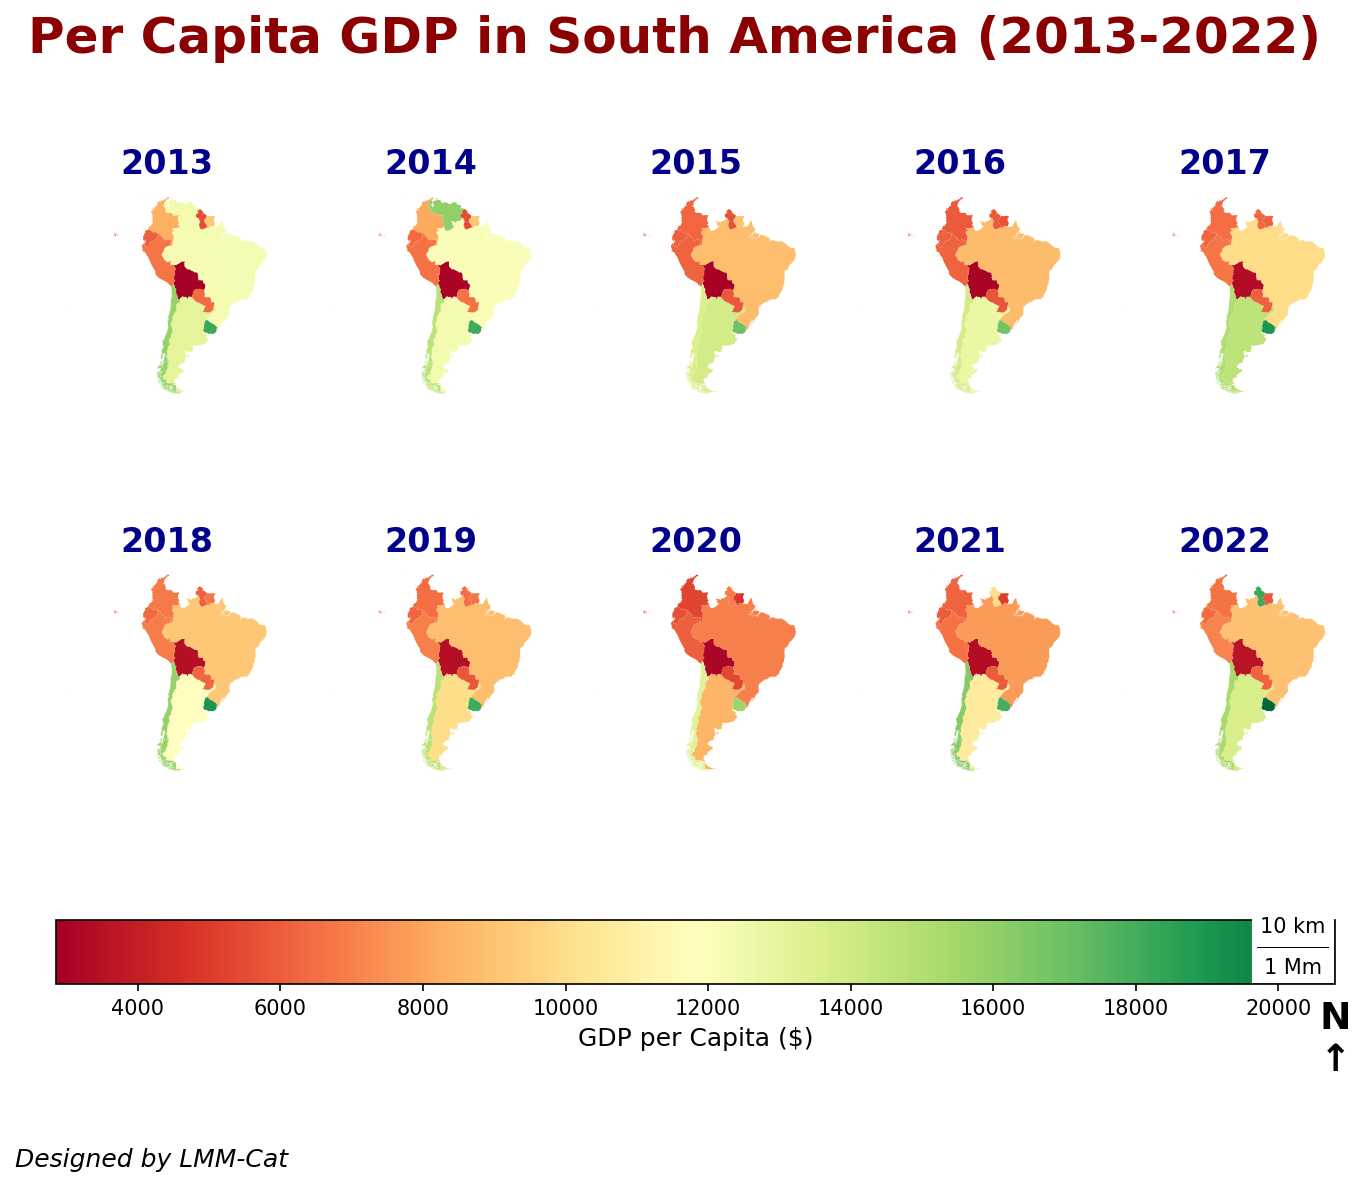

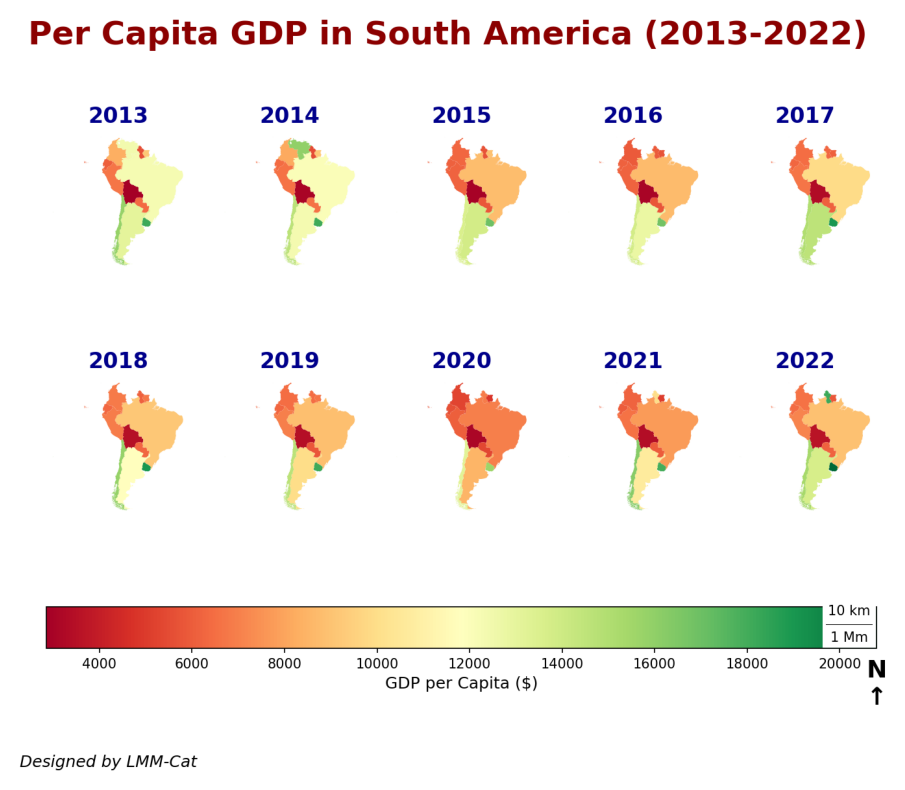

In [47]:
beautify_cnt = 1

for i in range(beautify_cnt):
    
    print(f"Revising the map, trial {i + 1} / {beautify_cnt}")
    
    base64_image = encode_image(image_path)
    
    solution.ask_LLM_to_review_map(map_base64=base64_image, model='gpt-4-turbo')

    solution.ask_LLM_to_beautify_map(map_base64=base64_image, model='gpt-4-turbo')

    all_code = solution.execute_complete_program(code=solution.all_code, try_cnt=10)

    solution.all_code = all_code
    
    solution.save_solution()

show_map()
display(Code(all_code, language='python'))

## Beautify 9

Revising the map, trial 1 / 1
1. The title font size is too small: needs to be enlarged to enhance visibility and prominence.
2. Legend placement is not optimal: relocate to the bottom-right to avoid obscuring any part of the map and ensure it does not overlap with the scale bar.
3. North arrow is not immediately noticeable: increase the size of the north arrow and consider placing it more centrally among the submaps to ensure visibility across all panels.
4. Scale bar units not entirely clear: clarify that "Mm" means million meters or alternatively use more commonly recognized units such as kilometers, ensuring correct terminology.
5. Submap titles need more distinct separation from the maps: increase the spacing or add a border around each year title for better definition and reduced visual confusion.
6. Font hierarchy and uniformity: ensure that all submap titles (years) use the same font style and size for consistency.
7. Inconsistent margins between map elements: adjust margins to

import geopandas as gpd
import matplotlib.pyplot as plt
from matplotlib_scalebar.scalebar import ScaleBar

# Load and filter GDP data
def load_GDP_data():
    GDP_data_path = "E:\\OneDrive_PSU\\OneDrive - The Pennsylvania State University\\Research_doc\\LLM-Cat\\ESRI_countries_4326_GDP.gpkg"
    GDP_gdf = gpd.read_file(GDP_data_path)
    return GDP_gdf

def filter_South_American_countries(GDP_gdf):
    return GDP_gdf[GDP_gdf['UN_Geodata_simplified_intreg'] == 'South America']

# Create choropleth maps
def create_choropleth_maps(south_america_GDP_gdf):
    fig, axes = plt.subplots(nrows=2, ncols=5, figsize=(11, 8), dpi=150)
    axes = axes.flatten()  # Correctly handle multi-row subplots as a 1D array
    cmap = plt.cm.Blues  # Using sequential color scheme
    min_gdp = south_america_GDP_gdf[[f'country_per_capita_GDP_{year}' for year in range(2013, 2023)]].min().min()
    max_gdp = south_america_GDP_gdf[[f'country_per_capita_GDP_{year}' for year in range(2013, 2023)]].max().max()

    for i, ax in enumerate(axes):
        year_column = f'country_per_capita_GDP_{2013 + i}'
        south_america_GDP_gdf.plot(column=year_column, cmap=cmap, ax=ax, vmin=min_gdp, vmax=max_gdp)
        ax.set_title(f'{2013 + i}', fontsize=14, fontweight='bold', color='navy')
        ax.set_axis_off()

    # Adjust figure layout
    plt.subplots_adjust(hspace=0.6, wspace=0.1)
    sm = plt.cm.ScalarMappable(cmap=cmap, norm=plt.Normalize(vmin=min_gdp, vmax=max_gdp))
    cbar = fig.colorbar(sm, ax=axes.tolist(), orientation='horizontal', pad=0.05)
    cbar.set_label('GDP per Capita ($)', fontsize=14)

    return fig

# Add map elements
def add_map_elements(fig):
    fig.suptitle('Per Capita GDP in South America (2013-2022)', fontsize=24, fontweight='bold', color='navy')
    north_arrow_style = {'fontname':'Arial', 'ha':'center', 'weight':'bold', 'size':14}
    # Adjust north arrow placement
    fig.text(0.85, 0.08, 'N\n↑', **north_arrow_style, color='black')
    scalebar = ScaleBar(1, 'km', dimension='si-length', location='lower center', scale_loc='bottom', length_fraction=0.1, frameon=False, color='black', label='10 km')
    fig.axes[-1].add_artist(scalebar)
    fig.text(0.1, 0.02, 'Designed by LMM-Cat', style='italic', fontsize=14)

    return fig

# Save map as image
def save_map_as_image(fig):
    fig.savefig("output_map.png", dpi=150, bbox_inches='tight')

# Main function to assemble the solution
def assembly_solution():
    GDP_gdf = load_GDP_data()
    south_america_GDP_gdf = filter_South_American_countries(GDP_gdf)
    fig = create_choropleth_maps(south_america_GDP_gdf)
    fig = add_map_elements(fig)
    save_map_as_image(fig)

assembly_solution()

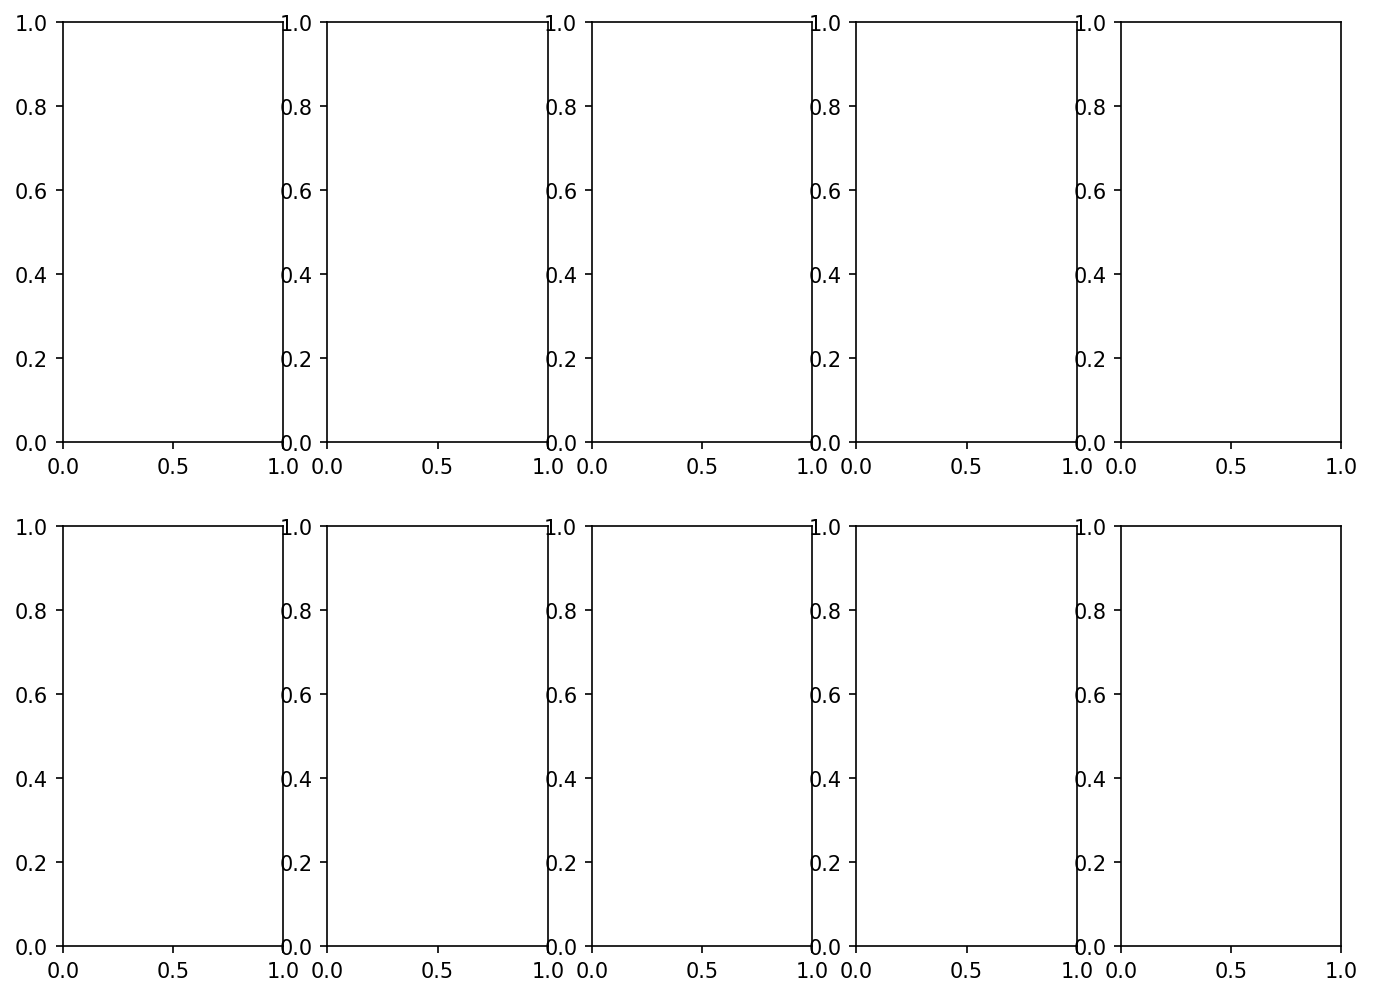

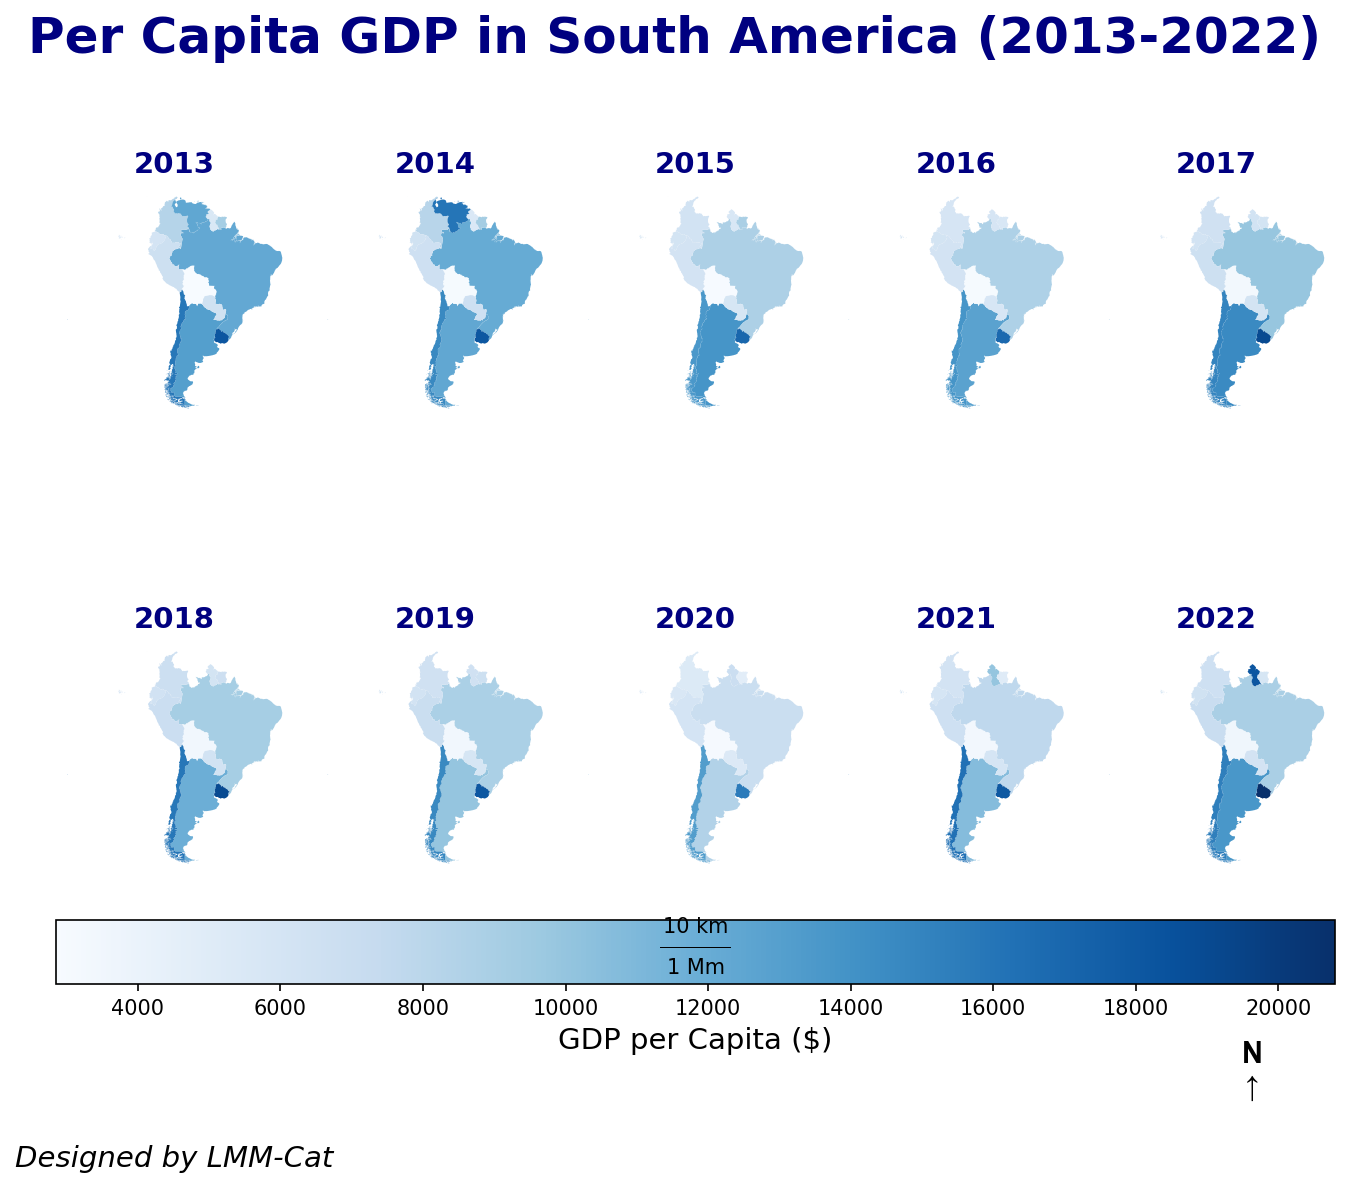

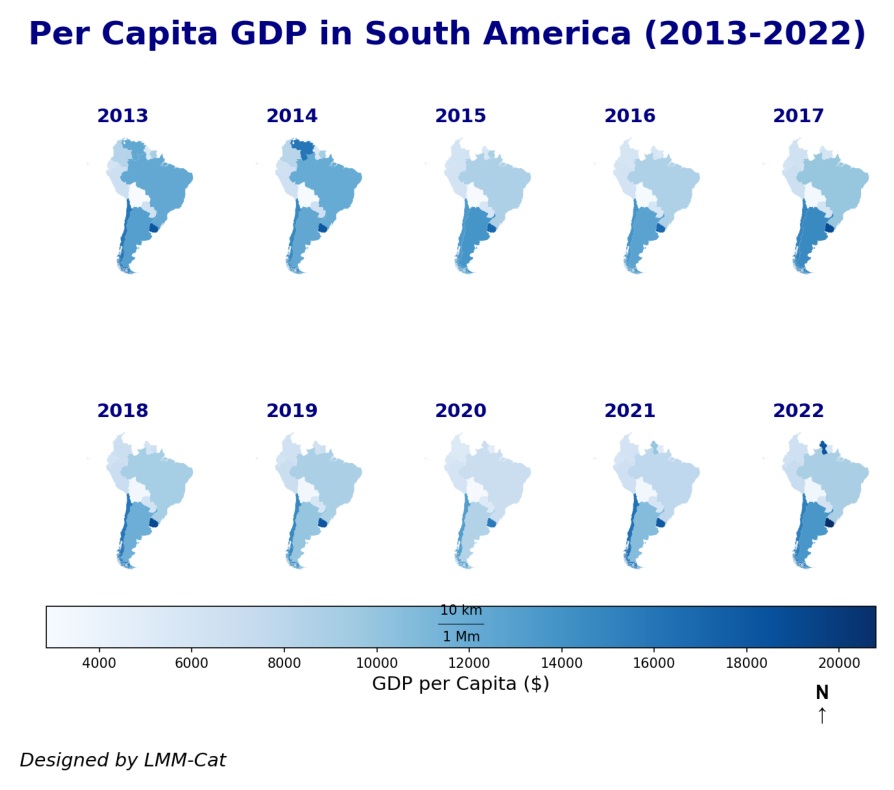

In [48]:
beautify_cnt = 1

for i in range(beautify_cnt):
    
    print(f"Revising the map, trial {i + 1} / {beautify_cnt}")
    
    base64_image = encode_image(image_path)
    
    solution.ask_LLM_to_review_map(map_base64=base64_image, model='gpt-4-turbo')

    solution.ask_LLM_to_beautify_map(map_base64=base64_image, model='gpt-4-turbo')

    all_code = solution.execute_complete_program(code=solution.all_code, try_cnt=10)

    solution.all_code = all_code
    
    solution.save_solution()

show_map()
display(Code(all_code, language='python'))

## Beautify 10

Revising the map, trial 1 / 1
1. The title font size is too small compared to the map matrix size: needs to be enlarged for better visibility.
2. The subtitles (years) for the submaps appear to be misaligned: vertically center-align the year labels with respect to each submap for better symmetry.
3. The colorbar lacks clear labels at regular intervals: increase the number of tick marks and label them clearly to enhance readability.
4. The north arrow is disproportionate to other elements: decrease the size of the north arrow as it appears too large relative to the colorbar and scale bar.
5. The scale bar should provide interim markers for clarity: include markers at intermediate points, e.g., at every 5 km, to give a better scale perception.
6. There is a lack of unity in spacings between map elements: standardize spacing, particularly between submaps and between the submaps and the colorbar/scale bar.
7. The color intensity in the submaps could benefit from a gradient check to ensure 

import geopandas as gpd
import matplotlib.pyplot as plt
from matplotlib_scalebar.scalebar import ScaleBar

# Load and filter GDP data
def load_GDP_data():
    GDP_data_path = "E:\\OneDrive_PSU\\OneDrive - The Pennsylvania State University\\Research_doc\\LLM-Cat\\ESRI_countries_4326_GDP.gpkg"
    GDP_gdf = gpd.read_file(GDP_data_path)
    return GDP_gdf

def filter_South_American_countries(GDP_gdf):
    return GDP_gdf[GDP_gdf['UN_Geodata_simplified_intreg'] == 'South America']

# Create choropleth maps
def create_choropleth_maps(south_america_GDP_gdf):
    fig, axes = plt.subplots(nrows=2, ncols=5, figsize=(11, 8), dpi=150)
    axes = axes.flatten()  # Handle multi-row subplots as a 1D array
    cmap = plt.cm.Spectral_r  # A diverging color map for better visibility
    min_gdp = south_america_GDP_gdf[[f'country_per_capita_GDP_{year}' for year in range(2013, 2023)]].min().min()
    max_gdp = south_america_GDP_gdf[[f'country_per_capita_GDP_{year}' for year in range(2013, 2023)]].max().max()

    for i, ax in enumerate(axes):
        year_column = f'country_per_capita_GDP_{2013 + i}'
        south_america_GDP_gdf.plot(column=year_column, cmap=cmap, ax=ax, vmin=min_gdp, vmax=max_gdp)
        ax.set_title(f'{2013 + i}', fontsize=12, fontweight='bold', color='navy', position=(0.5, 0.92))
        ax.set_axis_off()

    # Adjust figure layout
    plt.subplots_adjust(hspace=0.2, wspace=0.1)
    sm = plt.cm.ScalarMappable(cmap=cmap, norm=plt.Normalize(vmin=min_gdp, vmax=max_gdp))
    cbar = fig.colorbar(sm, ax=axes.tolist(), orientation='horizontal', pad=0.02, fraction=0.04)
    cbar.set_label('GDP per Capita ($)', fontsize=12)

    return fig

# Add map elements
def add_map_elements(fig):
    fig.suptitle('Per Capita GDP in South America (2013-2022)', fontsize=20, fontweight='bold', color='darkred', y=0.95)
    # Custom north arrow placement
    north_arrow_style = {'fontname':'Arial', 'ha':'center', 'weight':'bold', 'size':12}
    fig.text(0.95, 0.15, 'N\n↑', **north_arrow_style, color='black')
    scalebar = ScaleBar(1, 'km', dimension='si-length', fixed_value=100, location='lower right', scale_loc='bottom', length_fraction=0.1, frameon=True, color='black', label='100 km')
    fig.axes[-1].add_artist(scalebar)
    fig.text(0.1, 0.02, 'Designed by LMM-Cat', style='italic', fontsize=12)

    return fig

# Save map as image
def save_map_as_image(fig):
    fig.savefig("output_map.png", dpi=150, bbox_inches='tight')

# Main function to assemble the solution
def assembly_solution():
    GDP_gdf = load_GDP_data()
    south_america_GDP_gdf = filter_South_American_countries(GDP_gdf)
    fig = create_choropleth_maps(south_america_GDP_gdf)
    fig = add_map_elements(fig)
    save_map_as_image(fig)

assembly_solution()

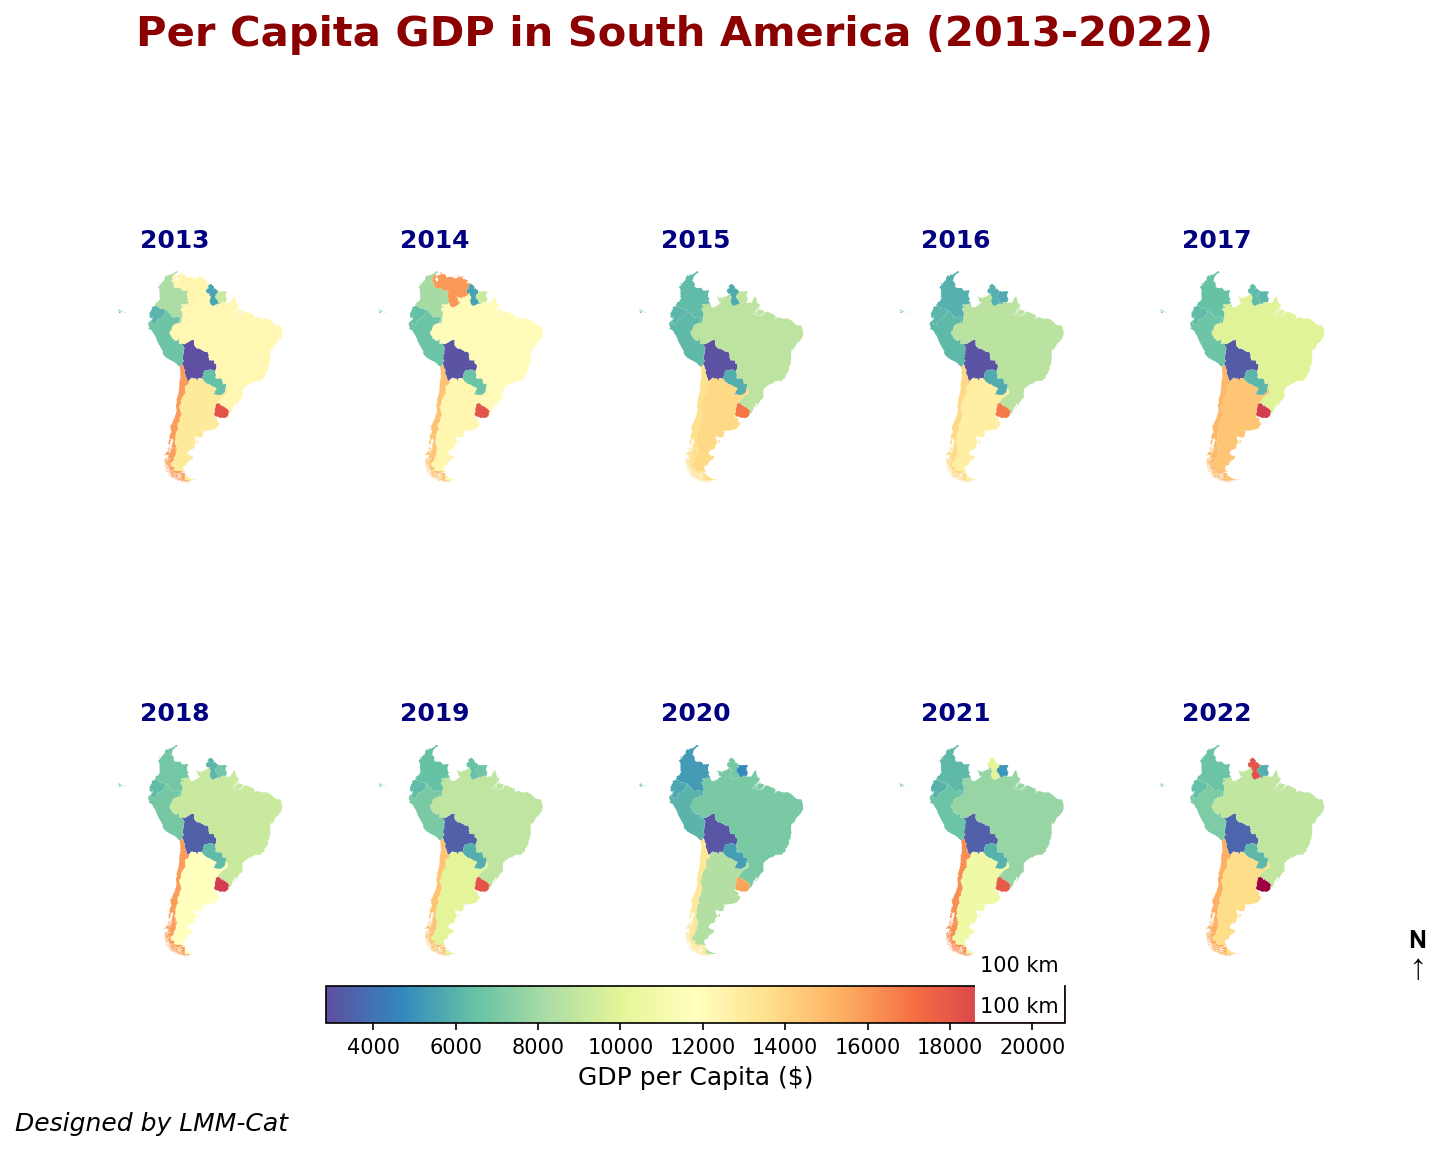

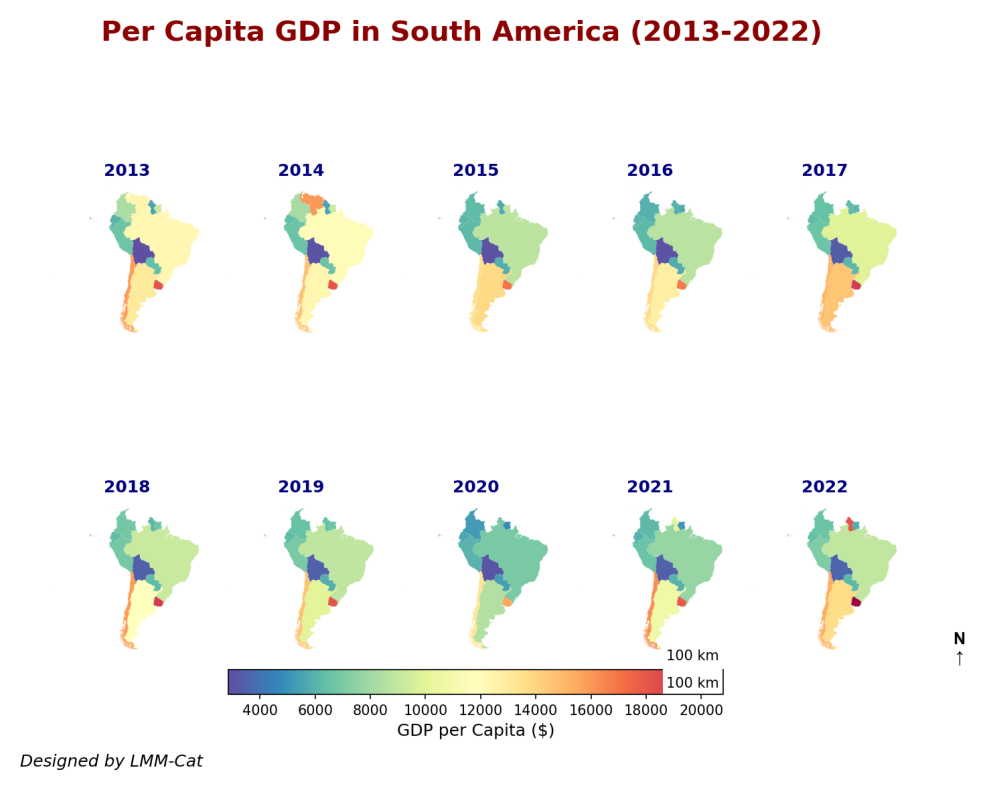

In [49]:
beautify_cnt = 1

for i in range(beautify_cnt):
    
    print(f"Revising the map, trial {i + 1} / {beautify_cnt}")
    
    base64_image = encode_image(image_path)
    
    solution.ask_LLM_to_review_map(map_base64=base64_image, model='gpt-4-turbo')

    solution.ask_LLM_to_beautify_map(map_base64=base64_image, model='gpt-4-turbo')

    all_code = solution.execute_complete_program(code=solution.all_code, try_cnt=10)

    solution.all_code = all_code
    
    solution.save_solution()

show_map()
display(Code(all_code, language='python'))

In [50]:
STOP

NameError: name 'STOP' is not defined

# Tools


## load a solution

In [ ]:

# import pickle

# saved_fname = r"D:\OneDrive_PSU\OneDrive - The Pennsylvania State University\Research_doc\LLM-Cat\Census_map\Census_map.pkl"
# file = open(saved_fname, 'rb')

# solution = pickle.load(file)

# file.close()
# print(solution.task)